In [355]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, precision_recall_curve, recall_score, accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score, precision_recall_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import label_binarize


In [ ]:
# Customers Data

In [2]:
customers = pd.read_csv("C:/Users/ali_s/Desktop/Areebah/Schulich/Data Science/Assignment 2/customers_final.csv")
customers

,customer_id,join_date,last_purchase_date,age,gender,location
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury
1,2,2021-09-08,2023-10-25,NaN,Male,Hillville
2,3,2021-06-01,2022-11-27,NaN,NaN,North Latoyatown
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad
4,5,2022-01-24,2023-06-02,NaN,Male,East Matthewfort
...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland


In [3]:
customers.info()
# have to convert dates from object to date format 
# missing values in age and gender 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   join_date           10000 non-null  object 
 2   last_purchase_date  10000 non-null  object 
 3   age                 8991 non-null   float64
 4   gender              9467 non-null   object 
 5   location            10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [4]:
# converting dates to datetime format
customers['join_date'] = pd.to_datetime(customers['join_date'])
customers['last_purchase_date'] = pd.to_datetime(customers['last_purchase_date'])

In [5]:
# % of missing data per column 
customers.isnull().sum()/100

# looking at the data, missing values seem to be MCAR

customer_id            0.00
join_date              0.00
last_purchase_date     0.00
age                   10.09
gender                 5.33
location               0.00
dtype: float64

In [ ]:
# Exploring options to treat missing values

In [ ]:
# Exploring Dropping Missing Values 
    # missing values are equal to 10% or less, we can remove this data after some further analysis 

In [6]:
customers.describe()
# mean age = 43.47

,customer_id,join_date,last_purchase_date,age
count,10000.00000,10000,10000,8991.000000
mean,5000.50000,2022-03-19 09:28:13.439999744,2023-04-25 18:26:12.480000,43.467467
min,1.00000,2020-01-01 00:00:00,2020-01-26 00:00:00,18.000000
25%,2500.75000,2021-02-15 00:00:00,2022-09-19 00:00:00,30.000000
50%,5000.50000,2022-03-19 00:00:00,2023-08-04 00:00:00,44.000000
75%,7500.25000,2023-04-28 00:00:00,2024-02-11 00:00:00,57.000000
max,10000.00000,2024-05-31 00:00:00,2024-05-31 00:00:00,69.000000
std,2886.89568,NaN,NaN,15.094380


<Axes: xlabel='age', ylabel='Count'>

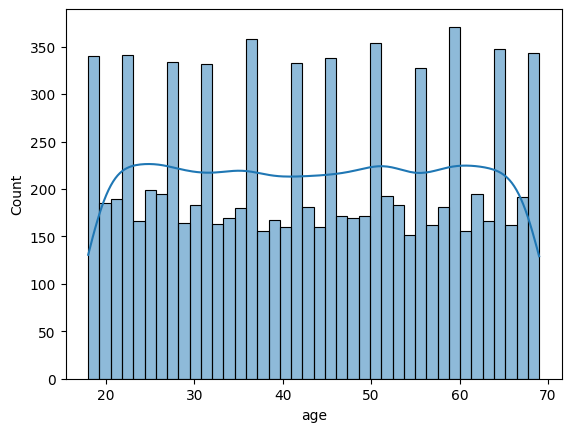

In [7]:
# data distribution before any treatment
sns.histplot(customers['age'], bins=40, kde=True)

In [8]:
# most commonly occuring gender 
customers['gender'].mode()[0]

'Male'

In [9]:
# creating a temporary customer data to inspect before/after changes in data characteristics when missing values are dropped
cust_temp = customers.dropna(subset=['age', 'gender'])
cust_temp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8522 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         8522 non-null   int64         
 1   join_date           8522 non-null   datetime64[ns]
 2   last_purchase_date  8522 non-null   datetime64[ns]
 3   age                 8522 non-null   float64       
 4   gender              8522 non-null   object        
 5   location            8522 non-null   object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 466.0+ KB


In [10]:
# checking mean after dropping
cust_temp.describe()
# mean age = 43.51

,customer_id,join_date,last_purchase_date,age
count,8522.000000,8522,8522,8522.000000
mean,5011.910350,2022-03-17 23:50:42.384417024,2023-04-24 13:58:16.925604352,43.511148
min,1.000000,2020-01-01 00:00:00,2020-01-26 00:00:00,18.000000
25%,2519.250000,2021-02-12 00:00:00,2022-09-18 00:00:00,30.000000
50%,5020.500000,2022-03-15 00:00:00,2023-08-05 00:00:00,44.000000
75%,7505.500000,2023-04-29 00:00:00,2024-02-13 00:00:00,57.000000
max,10000.000000,2024-05-31 00:00:00,2024-05-31 00:00:00,69.000000
std,2884.068515,NaN,NaN,15.096962


<Axes: xlabel='age', ylabel='Count'>

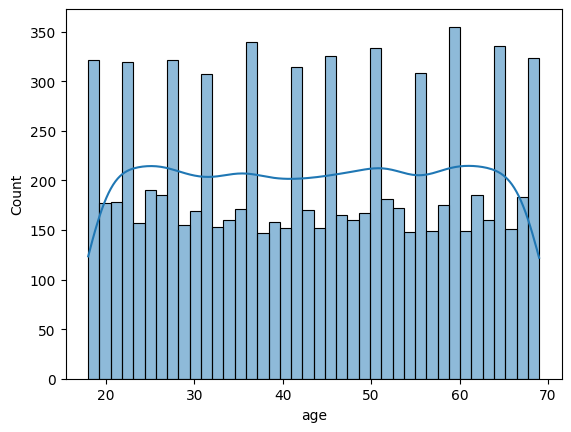

In [11]:
# data distribution after dropping missing values
sns.histplot(cust_temp['age'], bins=40, kde=True)

In [12]:
cust_temp['gender'].mode()[0]
# mode didnt change

'Male'

In [ ]:
# upon inspecting the affect of dropping missing values, there's no significant change in the mean age, no change in distribution of age, while the mode gender remained the same 
# however, the customer data is reduced from 10,000 to ~8500 records
    # this reduction may result in issues of not enough data for model training, testing 
# therefore, missing values will be treated with imputation 
# for imputatation, gender will be imputed with mode while age will be imputed with mean to preserve the characteristics of dataset 
    # random imputation isnt used as it could introduce unnecessary noise or bias, is more complex to implement, and the amount of missing values isnt as much that we need random imputation to maintain variability of the data 

In [13]:
# imputing missing gender values with mode
gender_mode = customers['gender'].mode()[0]
customers['gender'].fillna(gender_mode, inplace=True)

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\3008265462.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['gender'].fillna(gender_mode, inplace=True)


In [14]:
# imputing missing values in age with the integer mean
mean_age = int(customers['age'].mean())
customers['age'].fillna(mean_age, inplace=True)

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\4059144165.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers['age'].fillna(mean_age, inplace=True)


In [15]:
customers.info()
# confirmed, no missing values remain now

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         10000 non-null  int64         
 1   join_date           10000 non-null  datetime64[ns]
 2   last_purchase_date  10000 non-null  datetime64[ns]
 3   age                 10000 non-null  float64       
 4   gender              10000 non-null  object        
 5   location            10000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 468.9+ KB


In [16]:
# checking duplicate values 
customer_duplicates = customers.duplicated()
print(customer_duplicates.sum())
# no duplicate values

0


In [17]:
# Creating Age groups 

customers['age'].describe()

# Using quantiles to make age groups

count    10000.000000
mean        43.420300
std         14.313236
min         18.000000
25%         32.000000
50%         43.000000
75%         55.000000
max         69.000000
Name: age, dtype: float64

In [18]:
def Age_Group(x):
     if 18 <= x < 32:
        return 'Young Adults'
     elif 32 <= x < 43:
        return 'Mid-Age Adults'
     elif 43 <= x < 55:
        return 'Old Adults'
     elif x >= 55:
        return 'Seniors'
     else:
        return 'Other'

In [19]:
customers['Age_Group'] = customers['age'].apply(Age_Group)

In [ ]:
# Engagements Data

In [20]:
engagements = pd.read_csv("C:/Users/ali_s/Desktop/Areebah/Schulich/Data Science/Assignment 2/engagements_final.csv")
engagements

,customer_id,number_of_site_visits,number_of_emails_opened,number_of_clicks
0,1,10,15,1
1,2,285,49,51
2,3,192,73,25
3,4,110,30,17
4,5,161,2,7
...,...,...,...,...
9995,9996,119,47,16
9996,9997,3,33,14
9997,9998,53,17,5
9998,9999,23,5,4


In [21]:
engagements.info()
# all data is in correct data types, no missing values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              10000 non-null  int64
 1   number_of_site_visits    10000 non-null  int64
 2   number_of_emails_opened  10000 non-null  int64
 3   number_of_clicks         10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


In [22]:
# checking duplicate values 
engagements_duplicates = engagements.duplicated()
print(engagements_duplicates.sum())
# no duplicate values

0


In [23]:
# Engagement Categorization based on number_of_site_visits, number_of_emails_opened, number_of_clicks

engagement_metrics = ['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks']
print(engagements[engagement_metrics].describe())

       number_of_site_visits  number_of_emails_opened  number_of_clicks
count           10000.000000             10000.000000      10000.000000
mean              100.111900                39.862100         19.725300
std               118.625052                46.511719         22.975083
min                 1.000000                 1.000000          1.000000
25%                15.000000                 6.000000          3.000000
50%                53.000000                22.000000         11.000000
75%               141.000000                57.000000         28.000000
max               711.000000               303.000000        142.000000


In [24]:
def engagement_category(row):
    if (row['number_of_site_visits'] >= 141 and row['number_of_emails_opened'] >= 57 and row['number_of_clicks'] >= 28):
        return 'High Engagement'
    elif (row['number_of_site_visits'] <= 15 and row['number_of_emails_opened'] <= 6 and row['number_of_clicks'] <= 3):
        return 'Low Engagement'
    else:
        return 'Medium Engagement'
    
engagements['Engagement_Category'] = engagements.apply(engagement_category, axis=1)


In [25]:
# checking function results 
print(engagements['Engagement_Category'].value_counts())

Engagement_Category
Medium Engagement    7598
Low Engagement       1443
High Engagement       959
Name: count, dtype: int64


In [ ]:
# Marketing Data

In [26]:
marketing = pd.read_csv("C:/Users/ali_s/Desktop/Areebah/Schulich/Data Science/Assignment 2/marketing_final.csv")
marketing

# marketing data is more than customer data 
    # shows that each customer was exposed to multiple marketing campaigns 

,campaign_id,customer_id,response,promotion_type,campaign_date
0,1,1,No,Buy One Get One,2024-02-29
1,2,1,No,Discount,2024-01-24
2,3,1,No,Free Shipping,2024-03-05
3,4,1,Yes,Buy One Get One,2024-01-10
4,5,2,Yes,Free Shipping,2022-07-08
...,...,...,...,...,...
25195,25196,9998,Yes,Discount,2023-09-20
25196,25197,9999,No,Buy One Get One,2022-06-02
25197,25198,9999,No,Discount,2022-05-14
25198,25199,10000,No,Free Shipping,2023-06-12


In [27]:
marketing.info()
# no missing values
# convert campaign date to correct data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25200 entries, 0 to 25199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   campaign_id     25200 non-null  int64 
 1   customer_id     25200 non-null  int64 
 2   response        25200 non-null  object
 3   promotion_type  25200 non-null  object
 4   campaign_date   25200 non-null  object
dtypes: int64(2), object(3)
memory usage: 984.5+ KB


In [28]:
# converting dates to datetime format
marketing['campaign_date'] = pd.to_datetime(marketing['campaign_date'])

In [29]:
# checking duplicate values 
marketing_duplicates = marketing.duplicated()
print(marketing_duplicates.sum())
# no duplicate values

0


In [ ]:
# Feature Engineering for Marketing Data 

In [30]:
# no of campaigns each customer was exposed to
marketing['num_campaigns'] = marketing.groupby('customer_id')['campaign_id'].transform('count')

# no of campaigns each customer responded yes to
marketing['num_yes_campaigns'] = marketing.groupby('customer_id')['response'].transform(lambda x: (x == 'Yes').sum())

# most common campaign each customer said yes to
yes_promotions = marketing[marketing['response'] == 'Yes']
marketing['most_common_yes_promotion'] = marketing['customer_id'].map(yes_promotions.groupby('customer_id')['promotion_type'].apply(lambda x: x.mode()[0]))

# earliest campaign date 
marketing['earliest_campaign_date'] = marketing.groupby('customer_id')['campaign_date'].transform('min')

# earliest campaign date when user responded yes
yes_marketing = marketing[marketing['response'] == 'Yes']
marketing['earliest_yes_campaign_date'] = marketing['customer_id'].map(yes_marketing.groupby('customer_id')['campaign_date'].min())

# latest campaign date when user said yes 
marketing['latest_yes_campaign_date'] = marketing['customer_id'].map(yes_marketing.groupby('customer_id')['campaign_date'].max())

In [31]:
# making aggregated marketing dataframe, using only useful columns i.e. new features created and customer id 

marketing_agg = marketing.groupby('customer_id').agg({
    'num_campaigns': 'first',  # Already calculated correctly
    'num_yes_campaigns': 'first',  # Already calculated correctly
    'most_common_yes_promotion': 'first',  # Already calculated correctly
    'earliest_campaign_date': 'first',  # Already calculated correctly
    'earliest_yes_campaign_date': 'first',  # Already calculated correctly
    'latest_yes_campaign_date': 'first'  # Already calculated correctly
}).reset_index()

marketing_agg

,customer_id,num_campaigns,num_yes_campaigns,most_common_yes_promotion,earliest_campaign_date,earliest_yes_campaign_date,latest_yes_campaign_date
0,1,4,1,Buy One Get One,2024-01-10,2024-01-10,2024-01-10
1,2,4,2,Free Shipping,2021-11-12,2022-06-19,2022-07-08
2,3,2,1,Buy One Get One,2021-11-15,2021-11-15,2021-11-15
3,4,4,1,Free Shipping,2022-03-02,2022-07-22,2022-07-22
4,5,4,0,None,2022-02-06,NaT,NaT
...,...,...,...,...,...,...,...
9995,9996,3,0,None,2023-05-07,NaT,NaT
9996,9997,1,1,Buy One Get One,2022-10-25,2022-10-25,2022-10-25
9997,9998,1,1,Discount,2023-09-20,2023-09-20,2023-09-20
9998,9999,2,0,None,2022-05-14,NaT,NaT


In [ ]:
# Transactions Data

In [32]:
transactions = pd.read_csv("C:/Users/ali_s/Desktop/Areebah/Schulich/Data Science/Assignment 2/transactions_final.csv")
transactions

,transaction_id,customer_id,transaction_date,transaction_amount,product_category
0,1,1,2024-02-03,165.56,Clothing
1,2,1,2024-03-02,699.01,Home Goods
2,3,1,2024-03-12,146.86,Home Goods
3,4,1,2024-01-20,927.46,Electronics
4,5,1,2024-02-25,1395.87,Electronics
...,...,...,...,...,...
129540,129541,10000,2023-05-27,371.70,Home Goods
129541,129542,10000,2023-06-11,1245.23,Electronics
129542,129543,10000,2023-06-28,745.74,Electronics
129543,129544,10000,2023-07-21,587.37,Home Goods


In [33]:
transactions.info()
# no missing values 
# convert date to datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129545 entries, 0 to 129544
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction_id      129545 non-null  int64  
 1   customer_id         129545 non-null  int64  
 2   transaction_date    129545 non-null  object 
 3   transaction_amount  129545 non-null  float64
 4   product_category    129545 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 4.9+ MB


In [34]:
# converting dates to datetime format
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_date'])

In [35]:
# checking duplicate values 
transactions_duplicates = transactions.duplicated()

In [36]:
print(transactions_duplicates.sum())
# no duplicate values

0


In [37]:
# total number of transactions
transactions['total_transactions'] = transactions.groupby('customer_id')['transaction_id'].transform('nunique')

# number of categories shopped in for each customer
transactions['num_categories_shopped'] = transactions.groupby('customer_id')['product_category'].transform('nunique')

# frequency of transactions in each category for each customer

frequency_per_category = transactions.groupby(['customer_id', 'product_category']).size().unstack(fill_value=0).reset_index()
frequency_per_category = frequency_per_category.rename(columns=lambda x: f'frequency_{x}' if x != 'customer_id' else x)
transactions = transactions.merge(frequency_per_category, on='customer_id', how='left')

# total amount spent 
transactions['total_amount_spent'] = transactions.groupby('customer_id')['transaction_amount'].transform('sum')

# max purchase value
transactions['max_purchase_value'] = transactions.groupby('customer_id')['transaction_amount'].transform('max')

# min purchase value 
transactions['min_purchase_value'] = transactions.groupby('customer_id')['transaction_amount'].transform('min')

# avg purchase value 
transactions['avg_purchase_value'] = transactions.groupby('customer_id')['transaction_amount'].transform('mean')

# total amount spent in each category 

total_amount_per_category = transactions.groupby(['customer_id', 'product_category'])['transaction_amount'].sum().unstack(fill_value=0).reset_index()
total_amount_per_category.columns.name = None
total_amount_per_category = total_amount_per_category.rename(columns=lambda x: f'total_spent_{x}' if x != 'customer_id' else x)
transactions = transactions.merge(total_amount_per_category, on='customer_id', how='left')

# first purchase date for each customer
transactions['first_purchase_date'] = transactions.groupby('customer_id')['transaction_date'].transform('min')

# most recent purchase date for each customer
transactions['mostrecent_purchase_date'] = transactions.groupby('customer_id')['transaction_date'].transform('max')

In [ ]:
# RFM 

In [38]:
from datetime import datetime

In [39]:
# calculating recency (months)
    # current date - mostrecent purchase date 

current_date = datetime.now()
transactions['recency_months'] = ((current_date - transactions['mostrecent_purchase_date']).dt.days / 30).astype(int)

In [40]:
transactions.describe()
# total transactions (frequency)
    # mean : 16.95
    # std dev: 6
    # min - 1, max - 25 
    # 1st qt - 13, 2nd qt - 18, 3rd qt - 22
# total amount spent (monetary)
    # mean: 10108.105
    # std dev : 4100 
    # min - 23.8, max - 24298
    # 1st qt - 7134.5, 2nd qt - 10324, 3rd qt - 13103
# recency_months (recency)
    # mean - 15.28 
    # std dev - 11.8
    # min - 1, max - 54
    # 1st qt - 6, 2nd qt - 12, 3rd qt - 23

,transaction_id,customer_id,transaction_date,transaction_amount,total_transactions,num_categories_shopped,frequency_Clothing,frequency_Electronics,frequency_Home Goods,total_amount_spent,max_purchase_value,min_purchase_value,avg_purchase_value,total_spent_Clothing,total_spent_Electronics,total_spent_Home Goods,first_purchase_date,mostrecent_purchase_date,recency_months
count,129545.000000,129545.000000,129545,129545.000000,129545.000000,129545.000000,129545.000000,129545.000000,129545.000000,129545.000000,129545.000000,129545.000000,129545.000000,129545.000000,129545.000000,129545.000000,129545,129545,129545.000000
mean,64773.000000,4998.806237,2022-10-04 21:22:51.998919424,597.287659,16.946026,2.943487,5.669181,5.675757,5.601088,10108.104978,1639.519510,75.884746,597.287659,1442.812813,5808.375936,2856.916228,2022-04-15 02:04:39.840982272,2023-03-26 19:58:45.857424384,15.419954
min,1.000000,1.000000,2020-01-06 00:00:00,10.020000,1.000000,1.000000,0.000000,0.000000,0.000000,23.810000,23.810000,10.020000,23.810000,0.000000,0.000000,0.000000,2020-01-06 00:00:00,2020-01-26 00:00:00,1.000000
25%,32387.000000,2494.000000,2021-12-06 00:00:00,228.320000,13.000000,3.000000,4.000000,4.000000,4.000000,7134.530000,1485.300000,30.920000,508.290000,863.060000,3474.740000,1704.560000,2021-03-27 00:00:00,2022-08-17 00:00:00,6.000000
50%,64773.000000,5006.000000,2022-11-29 00:00:00,438.380000,18.000000,3.000000,6.000000,6.000000,6.000000,10324.620000,1757.260000,54.190000,590.472727,1384.280000,5563.030000,2749.530000,2022-04-17 00:00:00,2023-06-28 00:00:00,12.000000
75%,97159.000000,7476.000000,2023-09-18 00:00:00,846.980000,22.000000,3.000000,8.000000,8.000000,7.000000,13103.090000,1900.230000,92.750000,678.892778,1977.610000,7888.780000,3882.110000,2023-05-17 00:00:00,2024-01-12 00:00:00,23.000000
max,129545.000000,10000.000000,2024-05-31 00:00:00,1999.990000,25.000000,3.000000,16.000000,16.000000,16.000000,24298.220000,1999.990000,1997.080000,1997.080000,4737.820000,20939.740000,9749.940000,2024-05-31 00:00:00,2024-05-31 00:00:00,54.000000
std,37396.564648,2882.049926,NaN,491.564174,6.012544,0.260535,2.813895,2.798234,2.752132,4106.565328,346.497942,84.168508,138.545985,783.214455,3160.162505,1561.779755,NaN,NaN,11.835127


In [41]:
# RFM Scoring Logic 

# we will use the quantiles to assign scores from 1 to 4:

# Recency (R):
    # 1: Recency <= 6
    # 2: 6 < Recency <= 12
    # 3: 12 < Recency <= 23
    # 4: Recency > 23`

# Frequency (F):
    # 4: Frequency <= 13
    # 3: 13 < Frequency <= 18
    # 2: 18 < Frequency <= 22
    # 1: Frequency > 22

# Monetary (M):
    # 4: Monetary <= 7134.5
    # 3: 7134.5 < Monetary <= 10324
    # 2: 10324 < Monetary <= 13103
    # 1: Monetary > 13103

# Recency Score function
def Recency_Score(x):
    if x <= 6:
        return 1
    elif 6 < x <= 12:
        return 2
    elif 12 < x <= 23:
        return 3
    else:
        return 4

# Frequency Score function 
def Frequency_Score(x):
    if x <= 13:
        return 4
    elif 13 < x <= 18:
        return 3
    elif 18 < x <= 22:
        return 2
    else:
        return 1

# Monetary Score function 
def Monetary_Score(x):
    if x <= 7134.5:
        return 4
    elif 7134.5 < x <= 10324:
        return 3
    elif 10324 < x <= 13103:
        return 2
    else:
        return 1

In [42]:
# Calculate R, F, and M scores
transactions['R'] = transactions['recency_months'].apply(Recency_Score)
transactions['F'] = transactions['total_transactions'].apply(Frequency_Score)
transactions['M'] = transactions['total_amount_spent'].apply(Monetary_Score)

# RFM Score 
transactions['RFM_Score'] = transactions.R.map(str) + transactions.F.map(str) + transactions.M.map(str)


In [43]:
# making aggregated transactions dataframe, using only useful columns i.e. new features created and customer id 

transactions_agg = transactions.groupby('customer_id').agg({
    'num_categories_shopped': 'first',  # Already calculated correctly
    'total_transactions': 'first',  # Already calculated correctly
    'frequency_Clothing': 'first',  # Already calculated correctly
    'frequency_Electronics': 'first',  # Already calculated correctly
    'frequency_Home Goods': 'first',  # Already calculated correctly
    'total_amount_spent': 'first', # Already calculated correctly
    'max_purchase_value': 'first', # Already calculated correctly
    'min_purchase_value': 'first', # Already calculated correctly
    'avg_purchase_value': 'first', # Already calculated correctly
    'total_spent_Clothing': 'first', # Already calculated correctly
    'total_spent_Electronics': 'first', # Already calculated correctly
    'total_spent_Home Goods': 'first', # Already calculated correctly
    'first_purchase_date': 'first', # Already calculated correctly
    'mostrecent_purchase_date': 'first', # Already calculated correctly
    'recency_months': 'first', # Already calculated correctly
    'R': 'first', # Already calculated correctly
    'F': 'first', # Already calculated correctly
    'M': 'first', # Already calculated correctly
    'RFM_Score': 'first' # Already calculated correctly
})
transactions_agg

,num_categories_shopped,total_transactions,frequency_Clothing,frequency_Electronics,frequency_Home Goods,total_amount_spent,max_purchase_value,min_purchase_value,avg_purchase_value,total_spent_Clothing,total_spent_Electronics,total_spent_Home Goods,first_purchase_date,mostrecent_purchase_date,recency_months,R,F,M,RFM_Score
customer_id,,,,,,,,,,,,,,,,,,,
1,3,6,2,2,2,3509.48,1395.87,146.86,584.913333,340.28,2323.33,845.87,2024-01-09,2024-03-12,4,1,4,4,144
2,3,9,3,3,3,6081.32,1866.56,42.29,675.702222,815.59,3220.76,2044.97,2021-09-29,2023-02-26,16,3,4,4,344
3,3,6,2,3,1,1454.87,347.76,68.35,242.478333,613.24,773.28,68.35,2021-09-28,2022-11-18,20,3,4,4,344
4,3,20,8,6,6,7874.68,1778.86,26.42,393.734000,1318.56,4771.55,1784.57,2022-01-11,2022-08-31,22,3,2,3,323
5,3,24,7,7,10,15524.55,1977.50,43.88,646.856250,1660.70,6944.12,6919.73,2022-03-02,2023-06-01,13,3,1,1,311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,3,10,6,3,1,5498.20,1726.74,164.22,549.820000,2050.69,2743.63,703.88,2023-01-01,2023-06-11,13,3,4,4,344
9997,3,12,4,3,5,5848.30,1921.49,116.38,487.358333,1150.36,2307.43,2390.51,2022-07-15,2022-12-08,19,3,4,4,344
9998,2,3,0,2,1,3503.13,1863.82,462.45,1167.710000,0.00,3040.68,462.45,2023-11-13,2024-01-01,6,1,4,4,144


In [46]:
# joining all tables together
customers.set_index('customer_id', inplace=True)
engagements.set_index('customer_id', inplace=True)
transactions_agg.set_index('customer_id', inplace=True)
marketing_agg.set_index('customer_id', inplace=True)

df = customers.join(engagements, lsuffix='_cust', rsuffix='_engage').join(transactions_agg, rsuffix='_trans').join(marketing_agg, rsuffix='_market')
df.reset_index(inplace=True)
df

,customer_id,join_date,last_purchase_date,age,gender,location,Age_Group,number_of_site_visits,number_of_emails_opened,number_of_clicks,...,R,F,M,RFM_Score,num_campaigns,num_yes_campaigns,most_common_yes_promotion,earliest_campaign_date,earliest_yes_campaign_date,latest_yes_campaign_date
0,1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,Seniors,10,15,1,...,1,4,4,144,4,1,Buy One Get One,2024-01-10,2024-01-10,2024-01-10
1,2,2021-09-08,2023-10-25,43.0,Male,Hillville,Old Adults,285,49,51,...,3,4,4,344,4,2,Free Shipping,2021-11-12,2022-06-19,2022-07-08
2,3,2021-06-01,2022-11-27,43.0,Male,North Latoyatown,Old Adults,192,73,25,...,3,4,4,344,2,1,Buy One Get One,2021-11-15,2021-11-15,2021-11-15
3,4,2022-01-01,2022-09-01,29.0,Male,Grossstad,Young Adults,110,30,17,...,3,2,3,323,4,1,Free Shipping,2022-03-02,2022-07-22,2022-07-22
4,5,2022-01-24,2023-06-02,43.0,Male,East Matthewfort,Old Adults,161,2,7,...,3,1,1,311,4,0,None,2022-02-06,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,Mid-Age Adults,119,47,16,...,3,4,4,344,3,0,None,2023-05-07,NaT,NaT
9996,9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,Young Adults,3,33,14,...,3,4,4,344,1,1,Buy One Get One,2022-10-25,2022-10-25,2022-10-25
9997,9998,2023-09-17,2024-01-30,39.0,Male,New John,Mid-Age Adults,53,17,5,...,1,4,4,144,1,1,Discount,2023-09-20,2023-09-20,2023-09-20
9998,9999,2022-05-10,2022-07-15,31.0,Female,Andrewland,Young Adults,23,5,4,...,4,4,4,444,2,0,None,2022-05-14,NaT,NaT


In [47]:
# checking aggregate data for missing values 

print(df.isnull().sum())


customer_id                      0
join_date                        0
last_purchase_date               0
age                              0
gender                           0
location                         0
Age_Group                        0
number_of_site_visits            0
number_of_emails_opened          0
number_of_clicks                 0
Engagement_Category              0
num_categories_shopped           0
total_transactions               0
frequency_Clothing               0
frequency_Electronics            0
frequency_Home Goods             0
total_amount_spent               0
max_purchase_value               0
min_purchase_value               0
avg_purchase_value               0
total_spent_Clothing             0
total_spent_Electronics          0
total_spent_Home Goods           0
first_purchase_date              0
mostrecent_purchase_date         0
recency_months                   0
R                                0
F                                0
M                   

In [48]:
num_customers_zero_yes_campaigns = (marketing_agg['num_yes_campaigns'] == 0).sum()
print(f"Number of customers with zero 'num_yes_campaigns': {num_customers_zero_yes_campaigns}")

# missing values are those where there were no Yes responses to campaigns, hence no common yes promotion, and dates associated 

Number of customers with zero 'num_yes_campaigns': 2335


In [49]:
# filling missing values with zero 
df.fillna(0, inplace=True)  # Example: fill missing values with 0


C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\4092035913.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna(0, inplace=True)  # Example: fill missing values with 0


In [50]:
df.info()
# checking for data types in final df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customer_id                 10000 non-null  int64         
 1   join_date                   10000 non-null  datetime64[ns]
 2   last_purchase_date          10000 non-null  datetime64[ns]
 3   age                         10000 non-null  float64       
 4   gender                      10000 non-null  object        
 5   location                    10000 non-null  object        
 6   Age_Group                   10000 non-null  object        
 7   number_of_site_visits       10000 non-null  int64         
 8   number_of_emails_opened     10000 non-null  int64         
 9   number_of_clicks            10000 non-null  int64         
 10  Engagement_Category         10000 non-null  object        
 11  num_categories_shopped      10000 non-null  int64      

In [51]:
df['earliest_yes_campaign_date'] = pd.to_datetime(df['earliest_yes_campaign_date'])

In [52]:
df['latest_yes_campaign_date'] = pd.to_datetime(df['latest_yes_campaign_date'])

In [134]:
# Customer Life (months)
    # last purchase date - join date 

df['cust_life'] = ((df['last_purchase_date'] - df['join_date']).dt.days/30).astype(int)

In [86]:
# Response Time (months) : this shows how long it took for customers to make a purchase after they responded to a campaign, can show campaign effectiveness
    # last purchase date - latest yes campaign date 
df['campaign_response_months'] = (( df['mostrecent_purchase_date'] - df['latest_yes_campaign_date']).dt.days / 30).astype(int)

In [135]:
# CLV - assuming total amount spent = CLV 
df['CLV'] =  df['total_amount_spent']

In [ ]:
# Questions that can be answered using the prepared data 

    # Which age groups contributed to high CLV?
    # How did no of transactions affected CLV?
    # Which categories resulted in high CLV?
    # How many recent customers showed high CLV? 
    # How many old customers showed low CLV? 
    # General affect of customer age on CLV?
    # Affect of marketing campaigns on CLV? 
        # affect of number of campaigns each customer was exposed to on CLV?
        # affect of number of campaigns each customer responded yes to on CLV?
        # affect of responding yes to campaigns early on CLV?
        # affect of responding yes to campaigns late on CLV?

In [ ]:
# Conducting some EDA 

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\2543580834.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Group', y='CLV', data=df, palette='tab10')


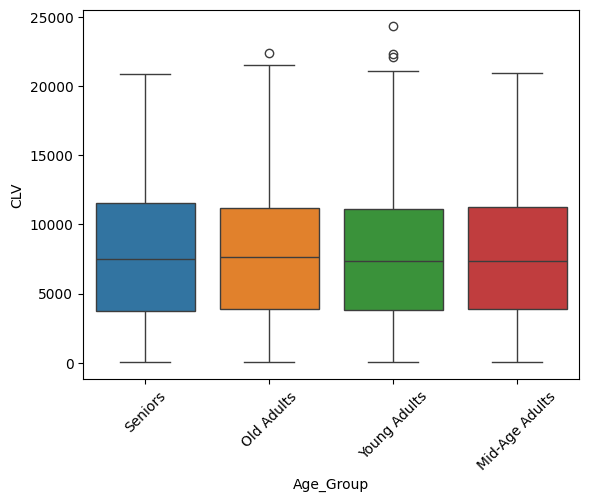

In [136]:
# Exploring CLV of various age groups
sns.boxplot(x='Age_Group', y='CLV', data=df, palette='tab10')
plt.xticks(rotation=45);
# no age specific CLV pattern revealed

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\3196430532.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='CLV', data=df, palette='tab10')


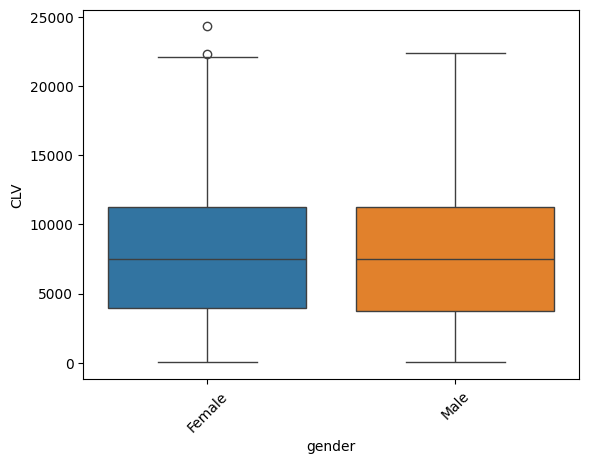

In [137]:
# Exploring CLV difference (if any) between genders 
sns.boxplot(x='gender', y='CLV', data=df, palette='tab10')
plt.xticks(rotation=45);
# no gender specific CLV pattern revealed

<Axes: xlabel='total_transactions', ylabel='CLV'>

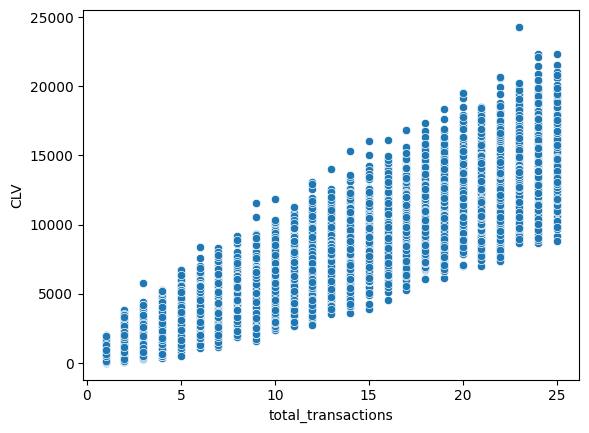

In [138]:
sns.scatterplot(x='total_transactions', y='CLV', data=df)
# Customers who make more transactions tend to have higher CLV, making the total number of transactions a critical factor in predicting customer value

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\3578551162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='R', y='CLV', data=df, palette='tab10')


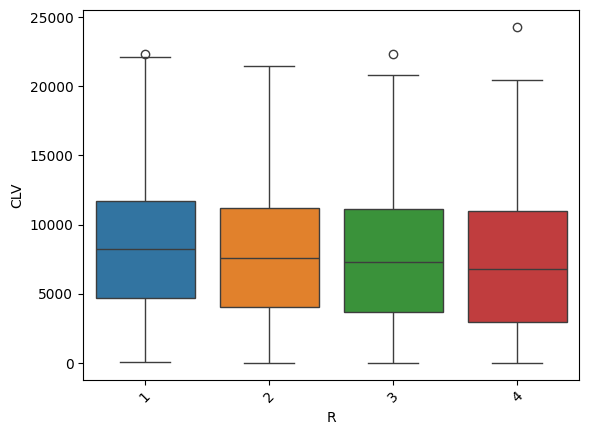

In [139]:
# Recency vs CLV
sns.boxplot(x='R', y='CLV', data=df, palette='tab10')
plt.xticks(rotation=45);
# no significant effect on CLV by recency 

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\2151687899.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='F', y='CLV', data=df, palette='tab10')


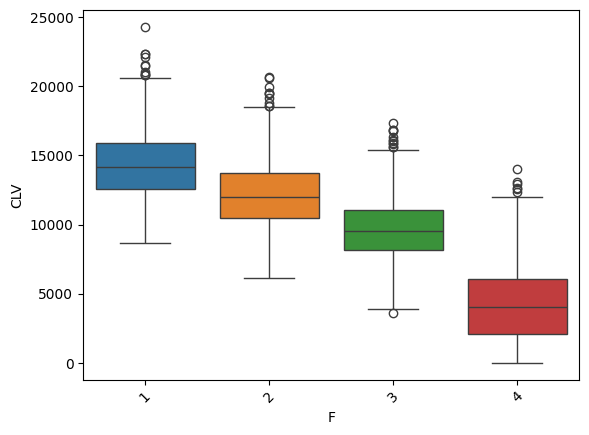

In [140]:
sns.boxplot(x='F', y='CLV', data=df, palette='tab10')
plt.xticks(rotation=45);

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\1794132863.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='M', y='CLV', data=df, palette='tab10')


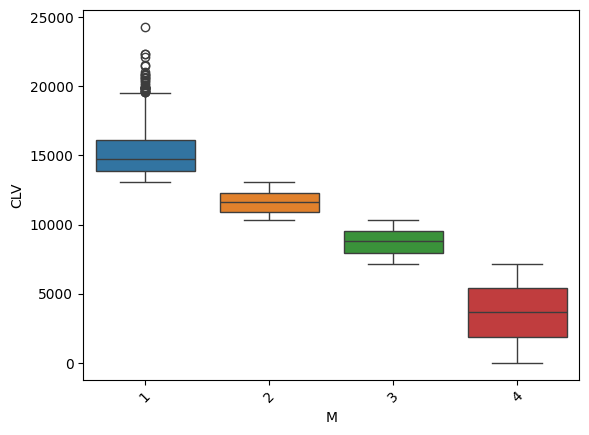

In [141]:
sns.boxplot(x='M', y='CLV', data=df, palette='tab10')
plt.xticks(rotation=45);

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\448193287.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num_campaigns', y='CLV', data=df, palette='tab10')


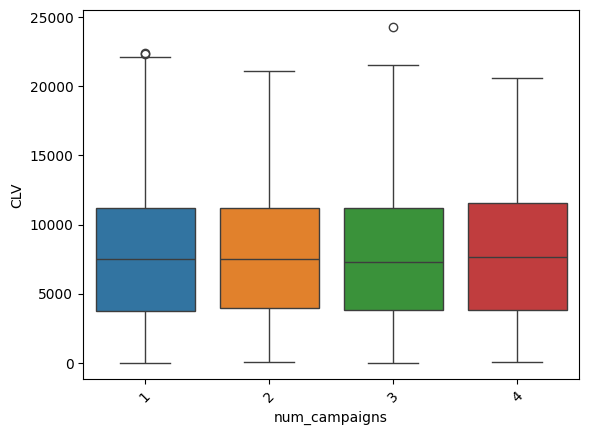

In [142]:
sns.boxplot(x='num_campaigns', y='CLV', data=df, palette='tab10')
plt.xticks(rotation=45);

# number of campaigns customer is exposed to doesnt have any effect on CLV as shown by boxplot and correlation both

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\777855723.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='num_yes_campaigns', y='CLV', data=df, palette='tab10')


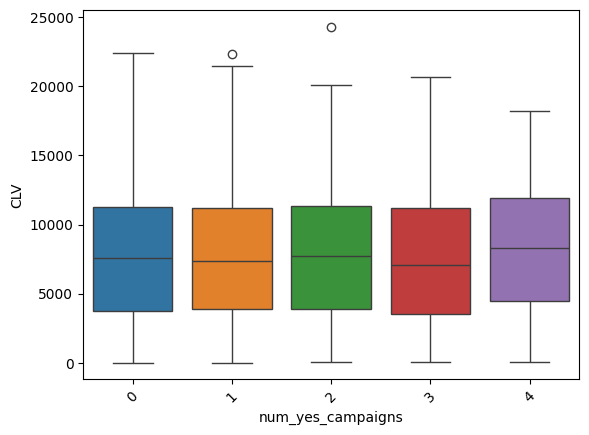

In [143]:
sns.boxplot(x='num_yes_campaigns', y='CLV', data=df, palette='tab10')
plt.xticks(rotation=45);


In [144]:
# Converting Engagement Category to Numeric Score 
def engagement_score(row):
    if row['Engagement_Category'] == 'High Engagement':
        return '1'
    elif row['Engagement_Category'] == 'Low Engagement':
        return '3'
    else:
        return '2'
    
df['Engagement_Score'] = df.apply(engagement_score, axis=1)

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\2619672013.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Engagement_Score', y='CLV', data=df, palette='tab10')


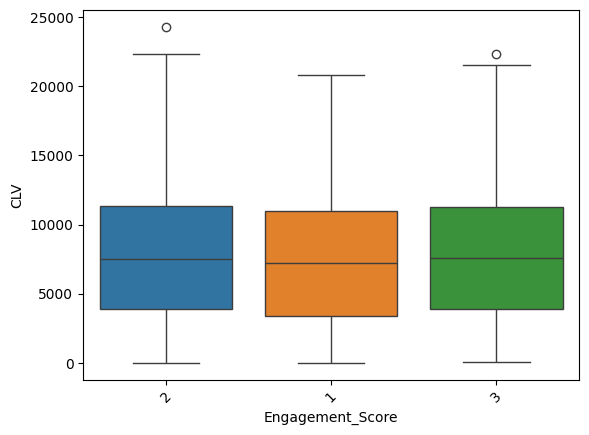

In [145]:
sns.boxplot(x='Engagement_Score', y='CLV', data=df, palette='tab10')
plt.xticks(rotation=45);

# Engagement does not seem to be a good enough indicator for CLV 

In [146]:
# Making categories for frequency and spend for each product category 
df['frequency_Clothing'].describe()

count    10000.000000
mean         4.324000
std          2.953624
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         16.000000
Name: frequency_Clothing, dtype: float64

In [147]:
# Clothing frequency 

def clothing_freq_score(row):
    if row['frequency_Clothing'] <= 2:
        return 4
    elif 2 < row['frequency_Clothing'] <= 4:
        return 3
    elif 4 < row['frequency_Clothing'] <= 6:
        return 2
    else:
        return 1
    
df['clothing_freq_score'] = df.apply(clothing_freq_score, axis=1)

In [70]:
df['total_spent_Clothing'].describe()

count    10000.000000
mean      1100.331939
std        802.140947
min          0.000000
25%        445.552500
50%        992.330000
75%       1639.642500
max       4737.820000
Name: total_spent_Clothing, dtype: float64

In [71]:
# Clothing Spend

def clothing_spend_score(row):
    if row['total_spent_Clothing'] <= 445.552500:
        return 4
    elif 445.552500 < row['total_spent_Clothing'] <= 992.330000:
        return 3
    elif 992.330000 < row['total_spent_Clothing'] <= 1639.642500:
        return 2
    else:
        return 1
    
df['clothing_spend_score'] = df.apply(clothing_spend_score, axis=1)

In [72]:
df['frequency_Electronics'].describe()

count    10000.000000
mean         4.346000
std          2.943221
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         16.000000
Name: frequency_Electronics, dtype: float64

In [73]:
# Electronics frequency 

def electronics_freq_score(row):
    if row['frequency_Electronics'] <= 2:
        return 4
    elif 2 < row['frequency_Electronics'] <= 4:
        return 3
    elif 4 < row['frequency_Electronics'] <= 6:
        return 2
    else:
        return 1
    
df['electronics_freq_score'] = df.apply(electronics_freq_score, axis=1)

In [74]:
df['total_spent_Electronics'].describe()

count    10000.000000
mean      4449.866865
std       3228.629318
min          0.000000
25%       1846.850000
50%       4050.215000
75%       6530.475000
max      20939.740000
Name: total_spent_Electronics, dtype: float64

In [75]:
# Electronics Spend

def electronics_spend_score(row):
    if row['total_spent_Electronics'] <= 1846.850000:
        return 4
    elif 1846.850000 < row['total_spent_Electronics'] <= 4050.215000:
        return 3
    elif 4050.215000 < row['total_spent_Electronics'] <= 6530.475000:
        return 2
    else:
        return 1
    
df['electronics_spend_score'] = df.apply(electronics_spend_score, axis=1)

In [76]:
df['frequency_Home Goods'].describe()

count    10000.000000
mean         4.284500
std          2.915375
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         16.000000
Name: frequency_Home Goods, dtype: float64

In [77]:
# Home Goods Frequency

def home_goods_freq_score(row):
    if row['frequency_Home Goods'] <= 2:
        return 4
    elif 2 < row['frequency_Home Goods'] <= 4:
        return 3
    elif 4 < row['frequency_Home Goods'] <= 6:
        return 2
    else:
        return 1
    
df['home_goods_freq_score'] = df.apply(home_goods_freq_score, axis=1)

In [78]:
df['total_spent_Home Goods'].describe()

count    10000.000000
mean      2187.364177
std       1600.424407
min          0.000000
25%        898.895000
50%       1976.675000
75%       3239.430000
max       9749.940000
Name: total_spent_Home Goods, dtype: float64

In [79]:
# Home Goods Spend

def home_goods_spend_score(row):
    if row['total_spent_Home Goods'] <= 898.895000:
        return 4
    elif 898.895000 < row['total_spent_Home Goods'] <= 1976.675000:
        return 3
    elif 1976.675000 < row['total_spent_Home Goods'] <= 3239.430000:
        return 2
    else:
        return 1
    
df['home_goods_spend_score'] = df.apply(home_goods_spend_score, axis=1)

c:\Users\ali_s\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.000000e+04
mean              inf
std               NaN
min      2.154751e-02
25%      9.476974e+00
50%      2.287526e+01
75%      6.738409e+01
max               inf
Name: CLV, dtype: float64

<Axes: xlabel='clothing_spend_score', ylabel='CLV'>

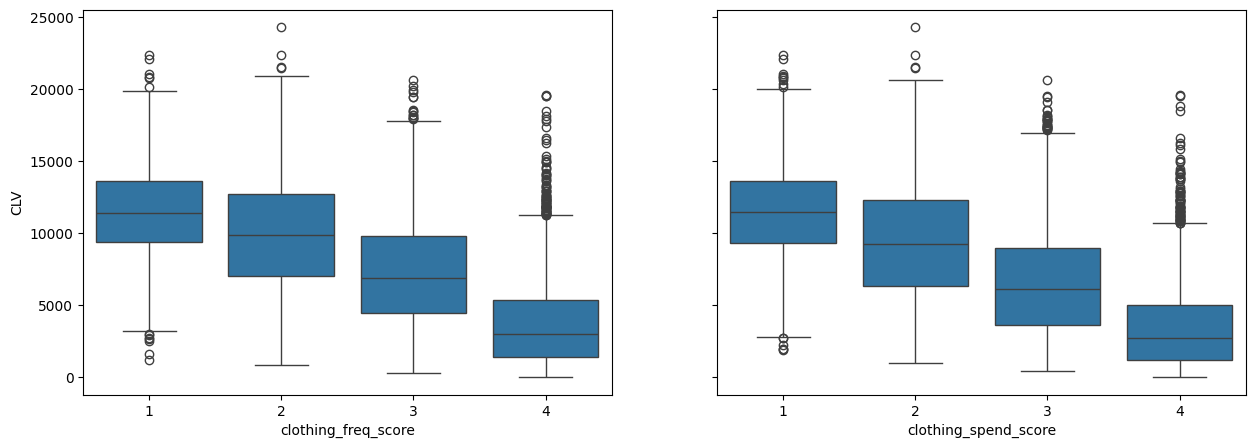

In [148]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,5), sharey=True)
sns.boxplot(x='clothing_freq_score', y='CLV' ,data=df, ax=ax1)
sns.boxplot(x='clothing_spend_score', y='CLV', data=df, ax=ax2)

# lower scores (higher frequency or spend) has higher CLV 

<Axes: xlabel='electronics_spend_score', ylabel='CLV'>

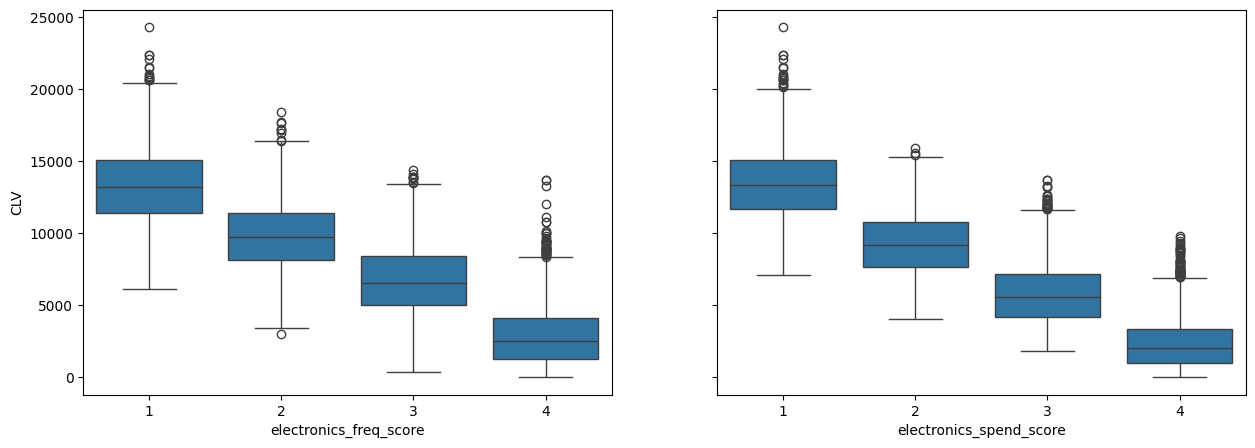

In [149]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,5), sharey=True)
sns.boxplot(x='electronics_freq_score', y='CLV', data=df, ax=ax1)
sns.boxplot(x='electronics_spend_score', y='CLV', data=df, ax=ax2)
# lower scores (higher frequency or spend) has higher CLV 

<Axes: xlabel='home_goods_spend_score', ylabel='CLV'>

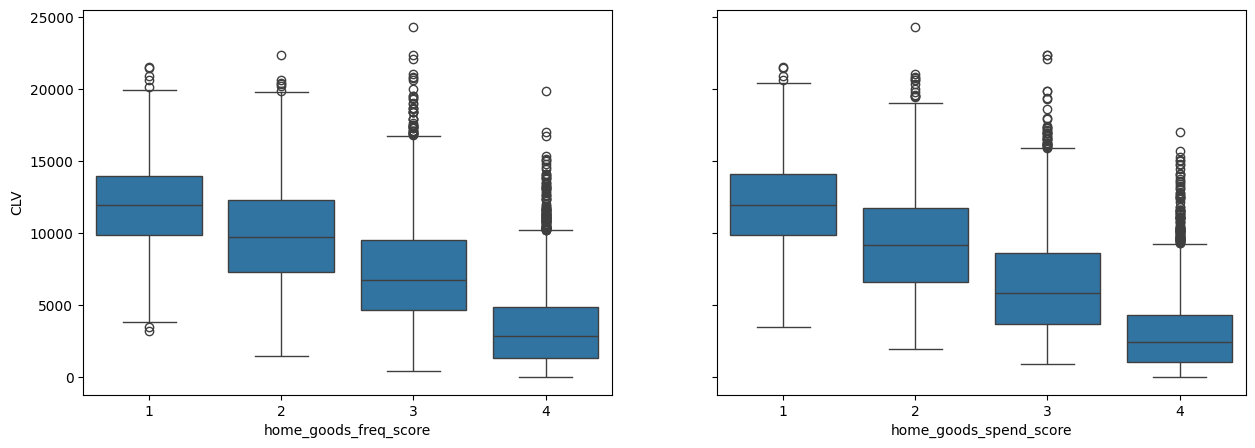

In [150]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (15,5), sharey=True)
sns.boxplot(x='home_goods_freq_score', data=df, y='CLV', ax=ax1)
sns.boxplot(x='home_goods_spend_score', data=df, y='CLV', ax=ax2)
# lower scores (higher frequency or spend) has higher CLV 

In [ ]:
# Upon visually inspecting the dataframe, it can be seen that for each category, there isnt always a match in spend and frequency score 
# this means that if a customer shopped the category more, does not mean they also spent more amount in it 
# similarly, some customers shopped lesser times but spent more amount 

In [105]:
# Making composite numerical RFM score to find the composite effect of R, F, M on CLV and avg CLV 
    # lower the score, the better, as low scores were attributed to better values of R,F,M

df['RFM_Composite'] = df['R'] + df['F'] + df['M']

In [151]:
total_spend_electronics = df['total_spent_Electronics'].sum()
total_spend_home_goods = df['total_spent_Home Goods'].sum()
total_spend_clothing = df['total_spent_Clothing'].sum()
total_clv = df['CLV'].sum()

contribution_electronics = total_spend_electronics / total_clv
contribution_home_goods = total_spend_home_goods / total_clv
contribution_clothing = total_spend_clothing / total_clv

print(f"Contribution of Electronics Spend to CLV: {contribution_electronics:.2%}")
print(f"Contribution of Home Goods Spend to CLV: {contribution_home_goods:.2%}")
print(f"Contribution of Clothing Spend to CLV: {contribution_clothing:.2%}")

Contribution of Electronics Spend to CLV: 57.51%
Contribution of Home Goods Spend to CLV: 28.27%
Contribution of Clothing Spend to CLV: 14.22%


<Axes: xlabel='campaign_response_months', ylabel='CLV'>

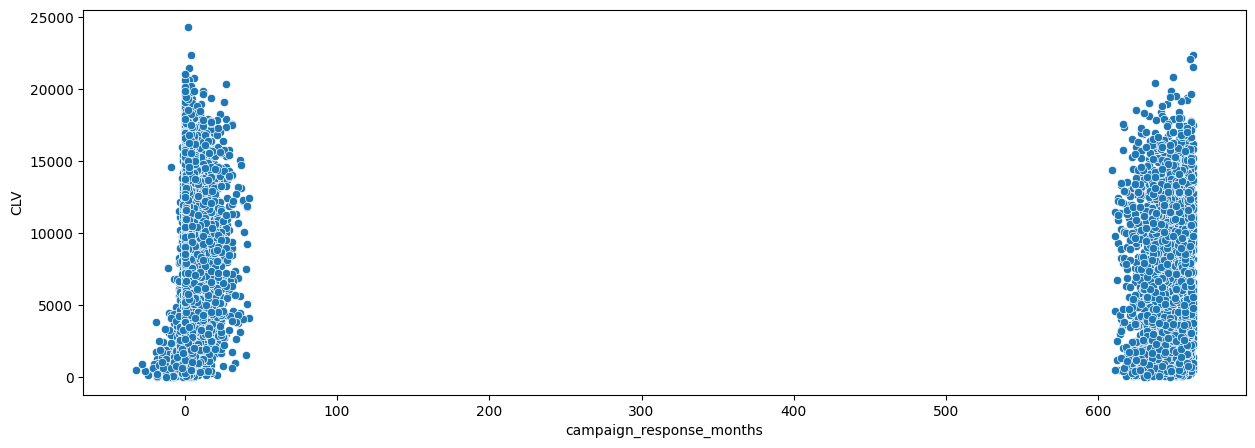

In [152]:
fig, (ax1) = plt.subplots(figsize = (15,5), sharey=True)
sns.scatterplot(x='campaign_response_months', data=df, y='CLV', ax=ax1)

In [153]:
df['avg_CLV/month'] = df['CLV'] / df['cust_life']

Text(0.5, 1.0, 'Correlation Heatmap')

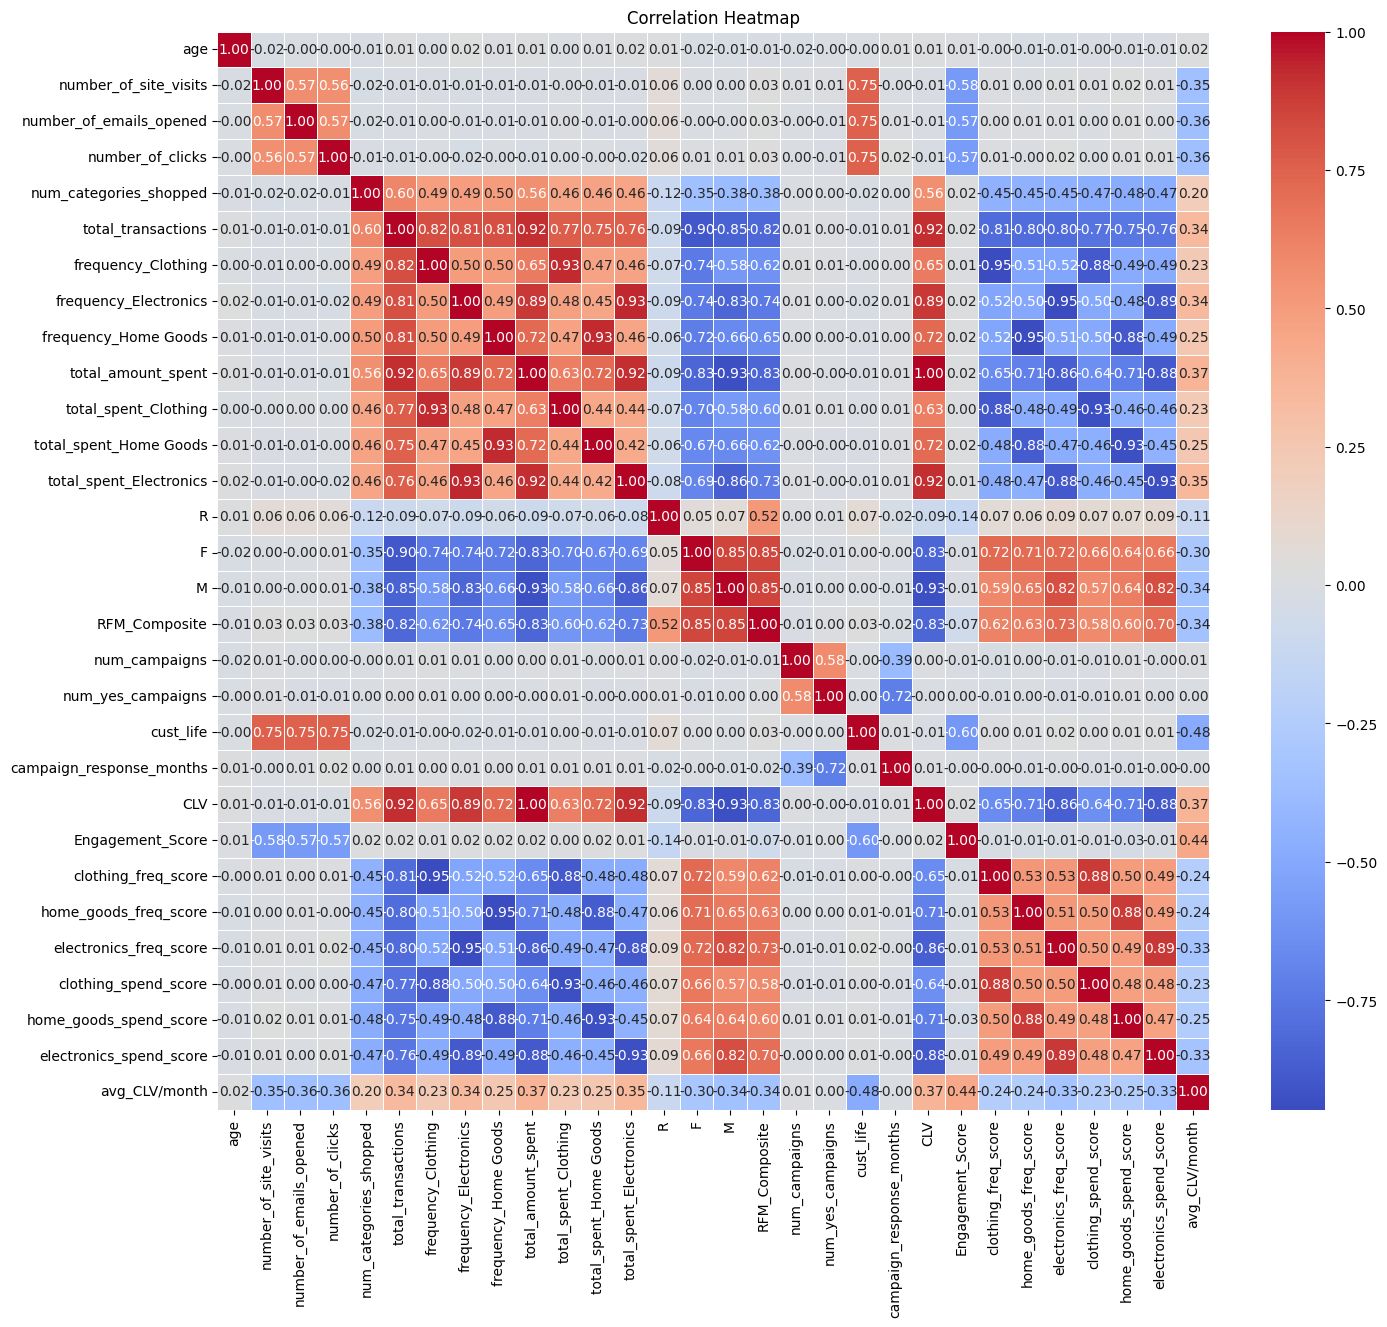

In [154]:
# Correlation between different numeric features and CLV 
plt.figure(figsize=(16, 14))
sns.heatmap(df[['age', 'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks', 'num_categories_shopped', 'total_transactions', 'frequency_Clothing', 'frequency_Electronics', 'frequency_Home Goods', 'total_amount_spent', 'total_spent_Clothing', 'total_spent_Home Goods', 'total_spent_Electronics', 'R', 'F', 'M','RFM_Composite', 'num_campaigns', 'num_yes_campaigns', 'cust_life','campaign_response_months', 'CLV', 'Engagement_Score', 'clothing_freq_score', 'home_goods_freq_score', 'electronics_freq_score', 'clothing_spend_score', 'home_goods_spend_score', 'electronics_spend_score','avg_CLV/month']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5).set_title('Correlation Heatmap')

# Findings: 
    # Engagement metrics and engagement score did not show a relatonship with CLV 
    # Engagement metrics seperately didnt show any relationship with avg CLV/month, but combined score did show 0.44 posirive relationship - showing composite effect of all engagement metrics
    
    # customer life did not show any correlation with CLV 
    # customer life has -0.48 relationship with avg CLV/month showing that customers may tend to spend more initially, or tend to stop or spend less as their customer life increases

    # Recency (R): Negligible correlation with CLV (-0.09). Recency does not have a significant direct relationship with CLV in this dataset. 
    # Frequency (F): Strong negative correlation with CLV (-0.83). Lower frequency scores (indicating higher purchase frequency) are associated with higher CLV, 
    # Monetary (M): Strong negative correlation with CLV (-0.93). Lower monetary scores (indicating higher spending) are associated with higher CLV.
    
    # no correlation between CLV or avg CLV/month and campaign_response_months

    # Correlation and above calculations shows that among the categories, highest contibution to CLV is from electronics spend, followed by home goods spend and then clothing spend 

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\3754256718.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='total_transactions', y='CLV', data=df, ax=ax1, palette="tab10")
C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\3754256718.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='num_campaigns', y='CLV', data=df, ax=ax2, palette="tab10")
C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\3754256718.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='num_yes_campaigns', y='CLV', data=df, ax=ax3, palette="tab10")
C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\3754256718.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='cust_life', y='CLV', data=df, ax=ax4, palette="tab10")
C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\3754256718.py:15: UserWarning: Ignoring `palette

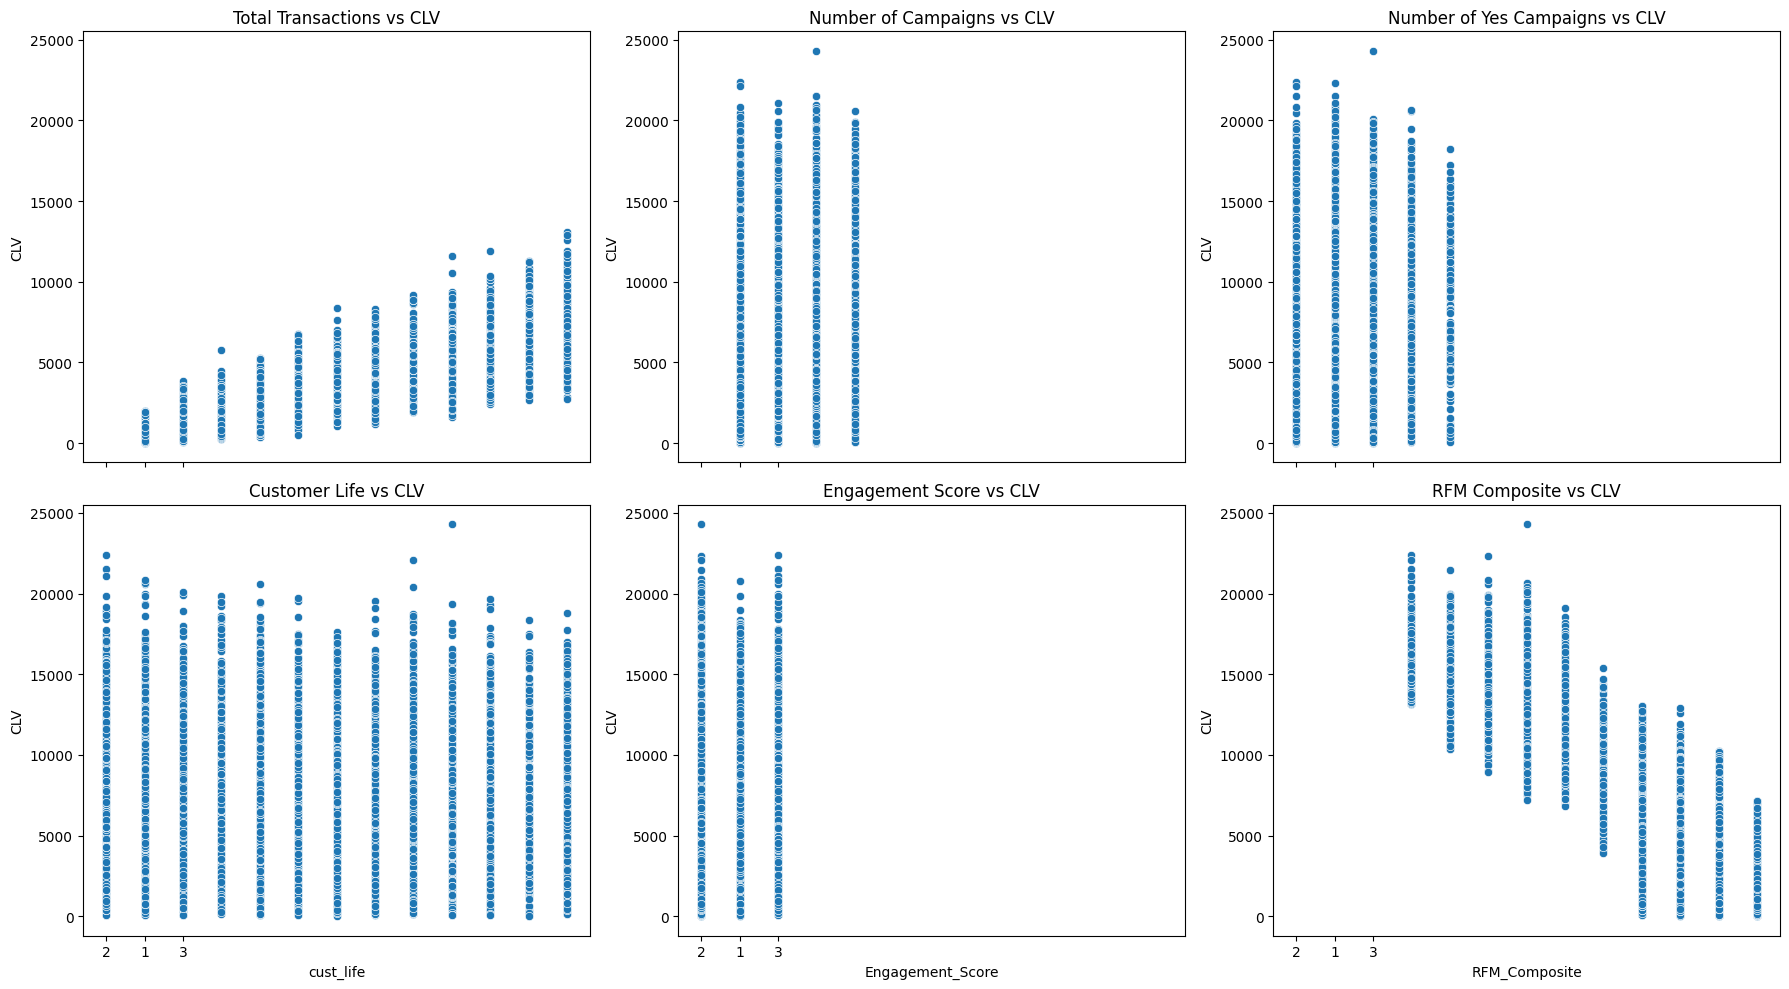

In [155]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 10), sharey=False, sharex=True)

sns.scatterplot(x='total_transactions', y='CLV', data=df, ax=ax1, palette="tab10")
ax1.set_title('Total Transactions vs CLV')

sns.scatterplot(x='num_campaigns', y='CLV', data=df, ax=ax2, palette="tab10")
ax2.set_title('Number of Campaigns vs CLV')

sns.scatterplot(x='num_yes_campaigns', y='CLV', data=df, ax=ax3, palette="tab10")
ax3.set_title('Number of Yes Campaigns vs CLV')

sns.scatterplot(x='cust_life', y='CLV', data=df, ax=ax4, palette="tab10")
ax4.set_title('Customer Life vs CLV')

sns.scatterplot(x='Engagement_Score', y='CLV', data=df, ax=ax5, palette="tab10")
ax5.set_title('Engagement Score vs CLV')

sns.scatterplot(x='RFM_Composite', y='CLV', data=df, ax=ax6, palette="tab10")
ax6.set_title('RFM Composite vs CLV')

plt.tight_layout()
plt.show()

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\1310269326.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='total_transactions', y='avg_CLV/month', data=df, ax=ax1, palette="tab10")
C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\1310269326.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='num_campaigns', y='avg_CLV/month', data=df, ax=ax2, palette="tab10")
C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\1310269326.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='num_yes_campaigns', y='avg_CLV/month', data=df, ax=ax3, palette="tab10")
C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\1310269326.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='cust_life', y='avg_CLV/month', data=df, ax=ax4, palette="tab10")
C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\13102693

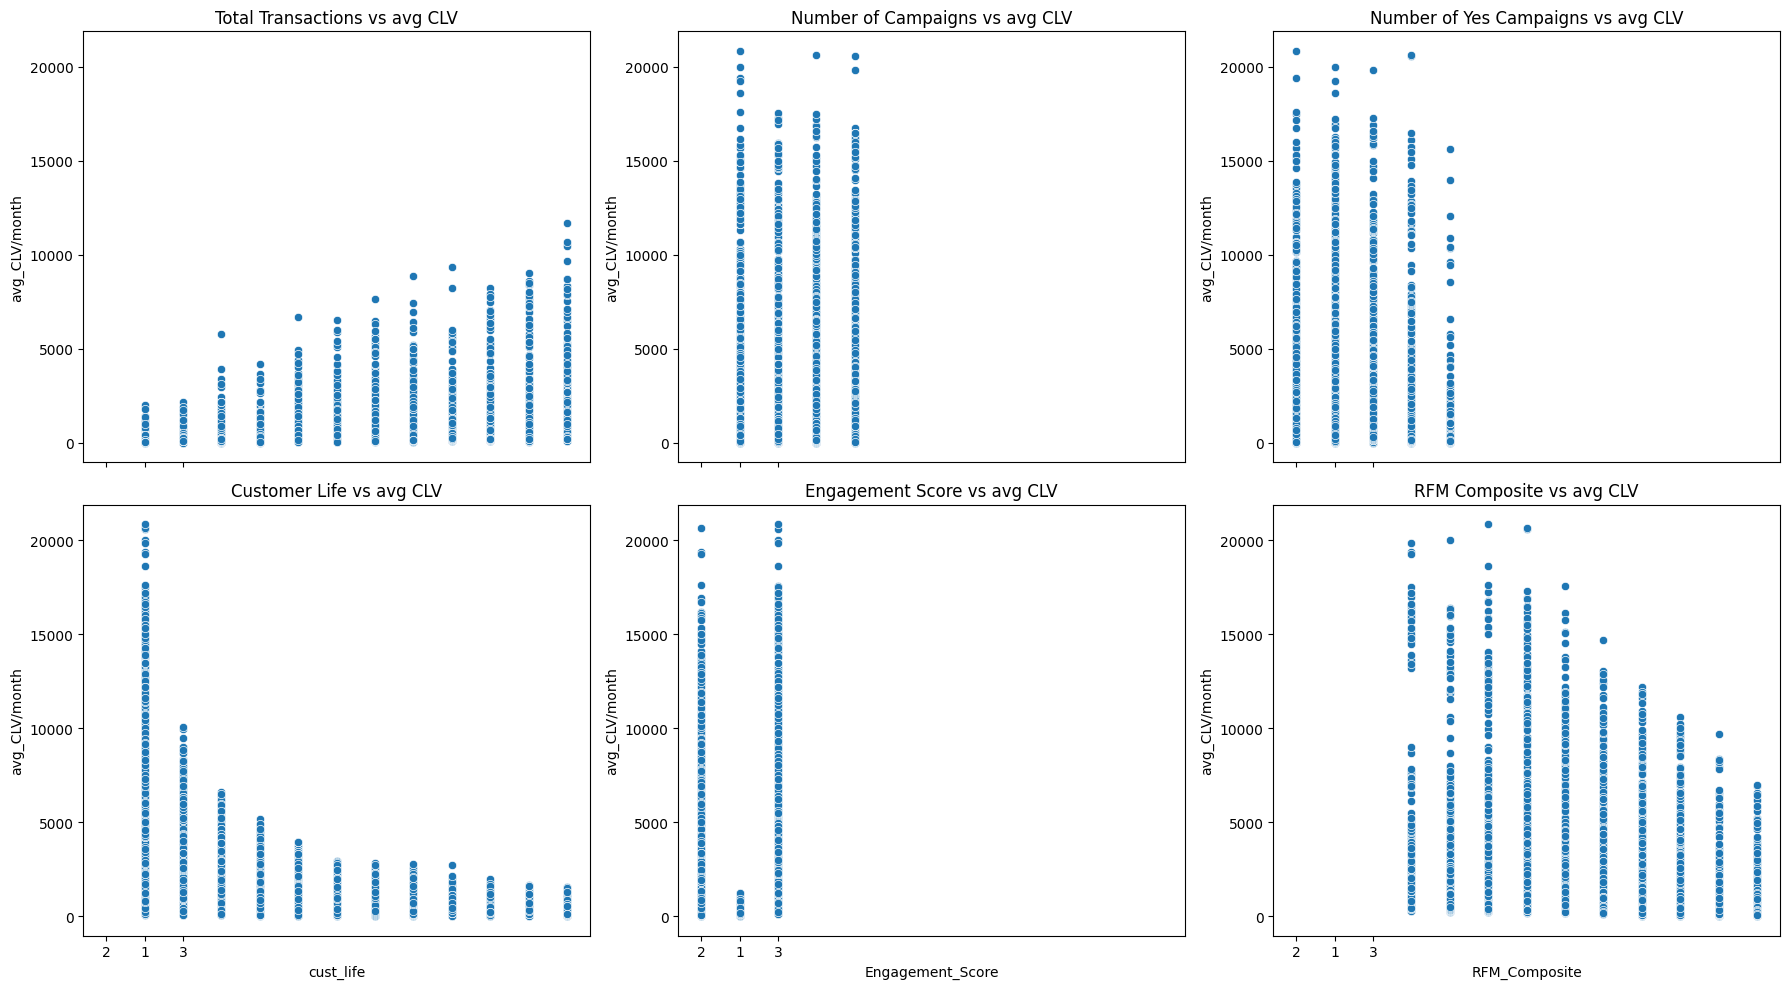

In [156]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 10), sharey=False, sharex=True)

sns.scatterplot(x='total_transactions', y='avg_CLV/month', data=df, ax=ax1, palette="tab10")
ax1.set_title('Total Transactions vs avg CLV')

sns.scatterplot(x='num_campaigns', y='avg_CLV/month', data=df, ax=ax2, palette="tab10")
ax2.set_title('Number of Campaigns vs avg CLV')

sns.scatterplot(x='num_yes_campaigns', y='avg_CLV/month', data=df, ax=ax3, palette="tab10")
ax3.set_title('Number of Yes Campaigns vs avg CLV')

sns.scatterplot(x='cust_life', y='avg_CLV/month', data=df, ax=ax4, palette="tab10")
ax4.set_title('Customer Life vs avg CLV')

sns.scatterplot(x='Engagement_Score', y='avg_CLV/month', data=df, ax=ax5, palette="tab10")
ax5.set_title('Engagement Score vs avg CLV')

sns.scatterplot(x='RFM_Composite', y='avg_CLV/month', data=df, ax=ax6, palette="tab10")
ax6.set_title('RFM Composite vs avg CLV')

plt.tight_layout()
plt.show()

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\984295225.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='R', y='CLV', data=df, ax=ax1, palette="tab10")
C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\984295225.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='F', y='CLV', data=df, ax=ax2, palette="tab10")
C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\984295225.py:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='M', y='CLV', data=df, ax=ax3, palette="tab10")


Text(0.5, 1.0, 'Monetary vs CLV')

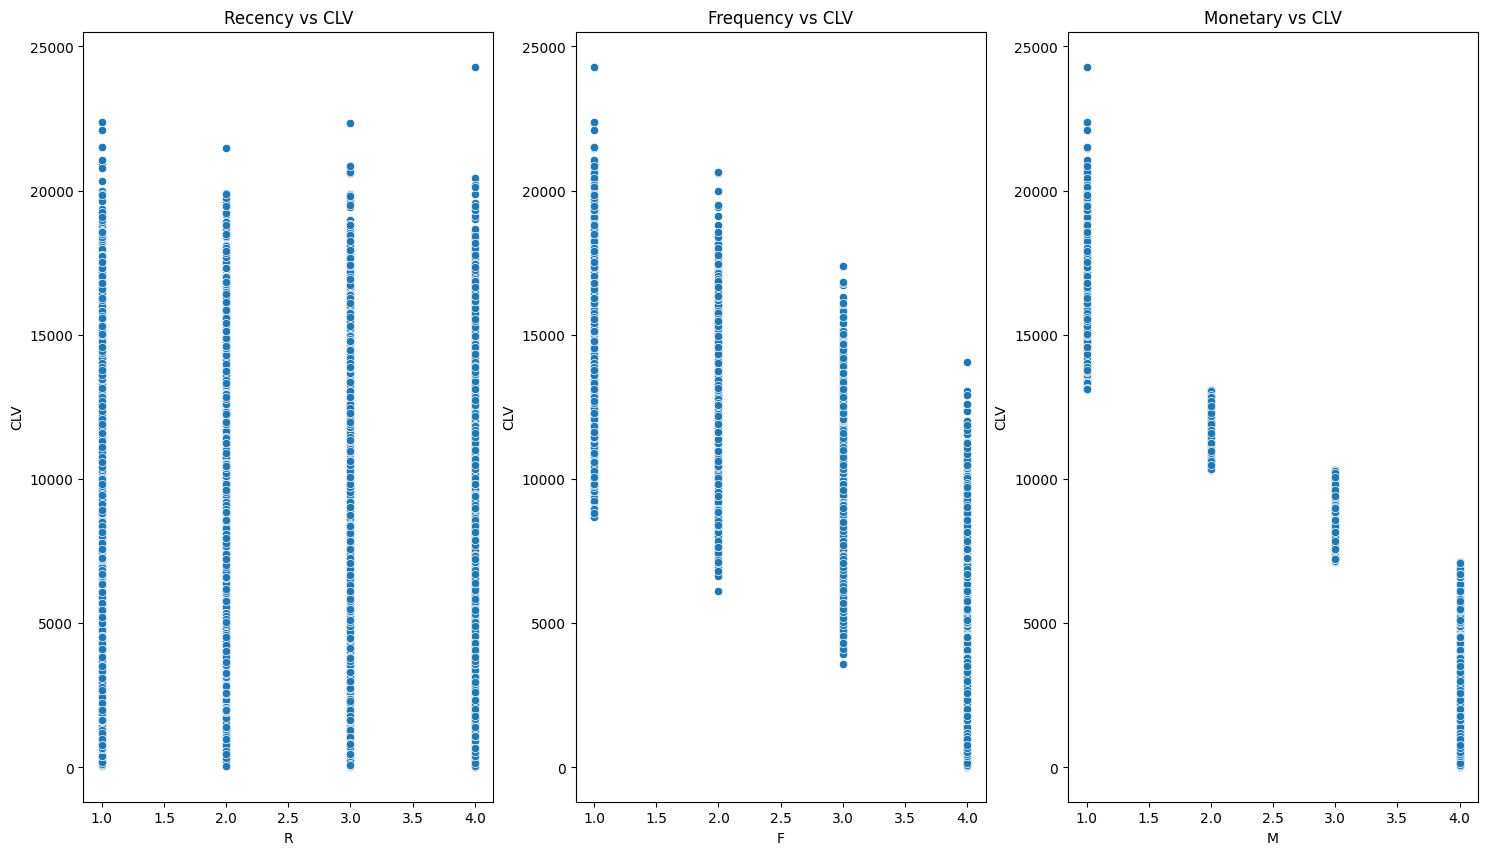

In [157]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(18, 10), sharey=False, sharex=True)

sns.scatterplot(x='R', y='CLV', data=df, ax=ax1, palette="tab10")
ax1.set_title('Recency vs CLV')

sns.scatterplot(x='F', y='CLV', data=df, ax=ax2, palette="tab10")
ax2.set_title('Frequency vs CLV')

sns.scatterplot(x='M', y='CLV', data=df, ax=ax3, palette="tab10")
ax3.set_title('Monetary vs CLV')

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\2292484900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='most_common_yes_promotion', y='CLV', data=df, ax=ax, palette="tab10")


<Axes: xlabel='most_common_yes_promotion', ylabel='CLV'>

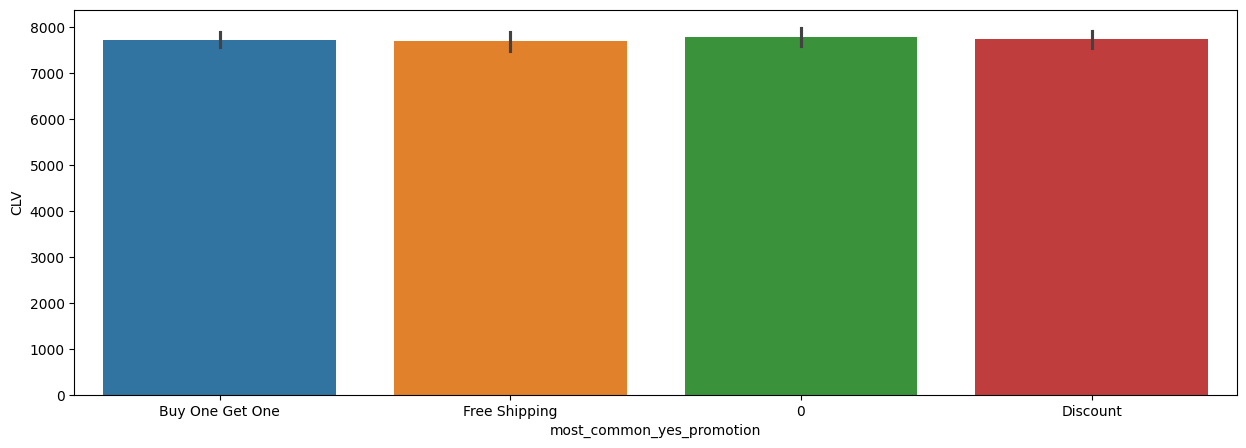

In [158]:
# campaign that was responded yes, contributing most to CLV 
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='most_common_yes_promotion', y='CLV', data=df, ax=ax, palette="tab10")

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\58010391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='most_common_yes_promotion', y='avg_CLV/month', data=df, ax=ax, palette="tab10")


<Axes: xlabel='most_common_yes_promotion', ylabel='avg_CLV/month'>

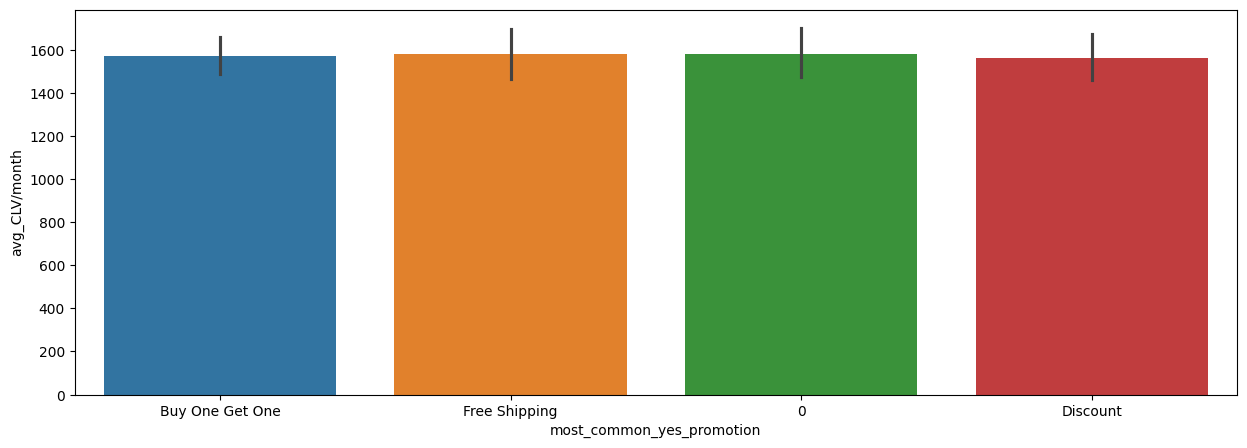

In [159]:
# campaign that was responded yes, contributing most to CLV 
fig, ax = plt.subplots(figsize=(15, 5))
sns.barplot(x='most_common_yes_promotion', y='avg_CLV/month', data=df, ax=ax, palette="tab10")

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\3626366069.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promotion_counts.index, y=promotion_counts.values, palette="tab10", ax=ax)


<Axes: xlabel='most_common_yes_promotion'>

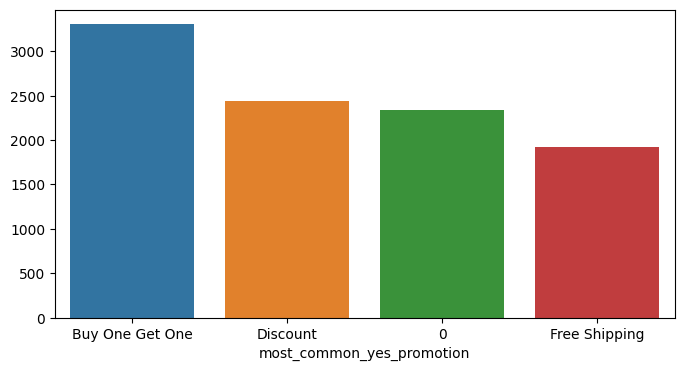

In [160]:
# most popular campaign (with response yes) among customers
promotion_counts = df['most_common_yes_promotion'].value_counts()

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=promotion_counts.index, y=promotion_counts.values, palette="tab10", ax=ax)

In [ ]:
# we will create models to predict CLV and avg CLV/month seperately 

# Definition and Purpose of each metric: 
    # CLV (total of all transaction amounts during the lifetime of customer/customer life in days)
        # predicts the total value a customer will bring over their entire relationship with the company
        # useful for long-term strategic planning and customer segmentation

# From the above analysis we can see that different features/factors are affecting different metrics 
    # CLV: 
        # correlation with total_transactions 
        # correlation with total categorical spend for each category aswell 
        # negative correlation with RFM_composite, showing that better RFM scores have higher CLV 
        # no relationship with customer life, could be because there's no impact of customer life on total CLV 
        # no relationship with engagement metrics, this could mean that engagement metrics and marketing efforts donot impact in longer run 
    # avg_CLV/month 
        # negative correlation with RFM_composite, showing that better RFM scores have higher CLV 
        # positive relationship with engagement score, but negative with seperate engagement metrics 
            # could mean that seperate metrics donot impact CLV as much but when combines they have a composite effect 
            # also shows that engagement metrics matter in the short term 
        # negative correlation with customer life could mean that customers tend to stop spending or spend less over their life, and spend more initially 


In [161]:
numerical_cols_df = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_df = df.select_dtypes(include=['object', 'category']).columns

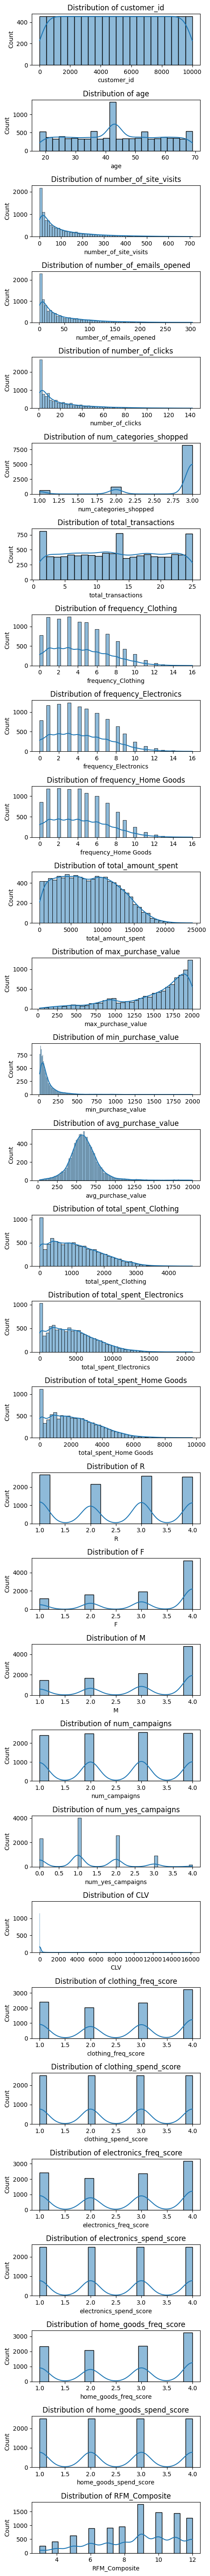

In [115]:
fig, axes = plt.subplots(len(numerical_cols_df), 1, figsize=(5, 2 * len(numerical_cols_df)))
for i, col in enumerate(numerical_cols_df):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\1295113432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], palette="tab10")
C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\1295113432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], palette="tab10")
C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\1295113432.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes[i], palette="tab10")
C:\Users\ali_s\AppData\Local\Temp\ipykernel_20032\1295113432.py:3: FutureWarning: 

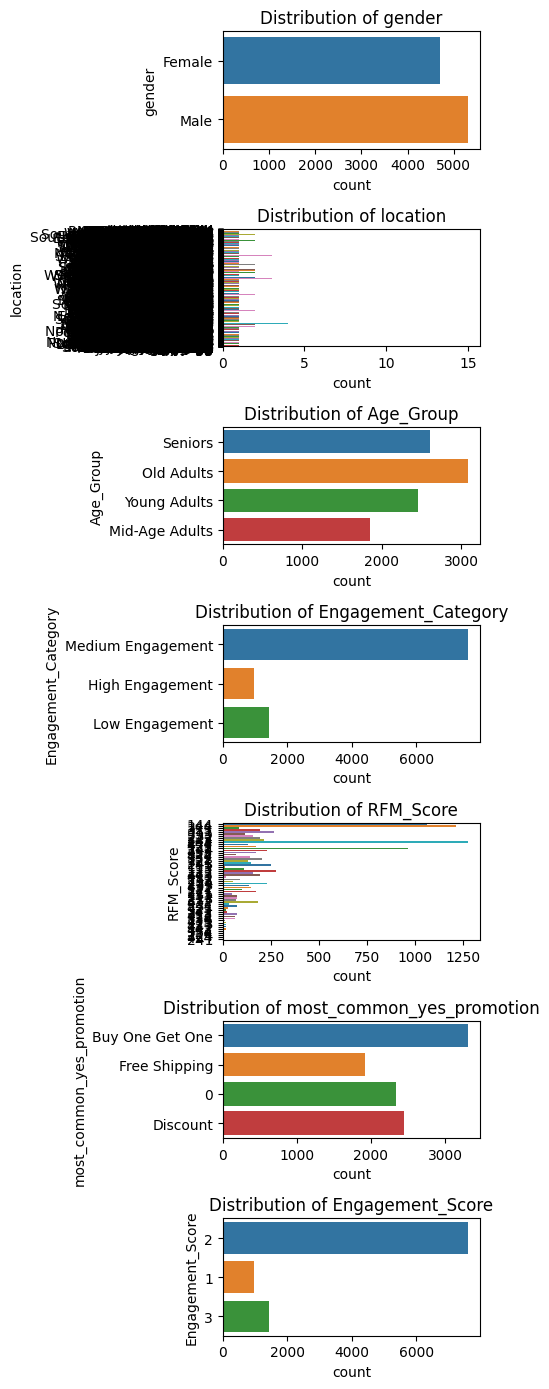

In [117]:
fig, axes = plt.subplots(len(categorical_cols_df), 1, figsize=(5, 2 * len(categorical_cols_df)))
for i, col in enumerate(categorical_cols_df):
    sns.countplot(y=df[col], ax=axes[i], palette="tab10")
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

<Axes: xlabel='CLV', ylabel='Count'>

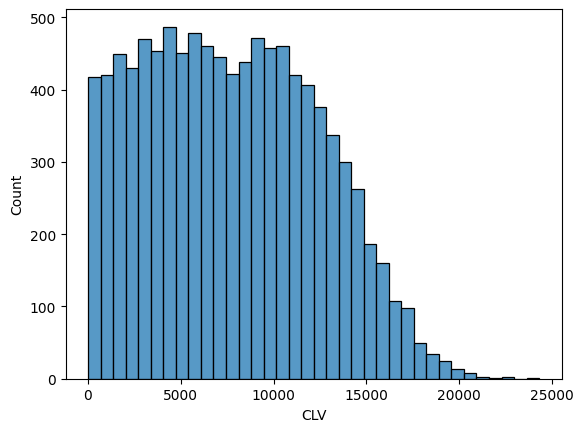

In [162]:
# Making CLV categories as well 

sns.histplot(df['CLV'])

<Axes: xlabel='avg_CLV/month', ylabel='Count'>

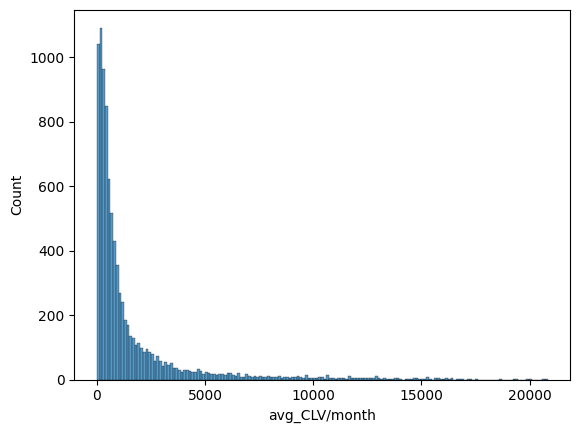

In [163]:
# Making CLV categories as well 

sns.histplot(df['avg_CLV/month'])

In [164]:
df['CLV'].describe()

count    10000.000000
mean      7737.562981
std       4628.799469
min         23.810000
25%       3839.915000
50%       7498.890000
75%      11275.797500
max      24298.220000
Name: CLV, dtype: float64

In [165]:
# Using the midpoint 7498.890000 to create a binary classification
   # Output 1 = High CLV, 0 = Low CLV
df['CLV_Category_binary'] = df['CLV'].apply(lambda x: 1 if x >=7498.890000 else 0)

In [166]:
clv_quantiles = df['CLV'].quantile([0, 0.25, 0.5, 0.75, 1]).values
clv_labels = [0, 1, 2, 3]
df['CLV_Category_multiclass'] = pd.cut(df['CLV'], bins=clv_quantiles, labels=clv_labels, include_lowest=True)

In [ ]:
# Model to predict CLV
    # we will use regression models to predict continuous values, while classification models to predict categories

# Input features for the model: 
    # Version 1 ['total_transactions','num_campaigns','num_yes_campaigns','cust_life','Engagement_Score','RFM_Composite','most_common_yes_promotion']]
    # Version 2 ['total_transactions','num_campaigns','num_yes_campaigns','cust_life','Engagement_Score', 'R', 'F', 'M','most_common_yes_promotion']]
        # we will test these seperate R,F,M models for each model to see if there's improvement 
# We have picked features according to the findings of EDA, while some features are picked despite no apparant correlation or relationship with the output variables as we still think it may have an impact on the output 
# correlation matrix has shown no multicolinearity between these variables 

In [167]:
df['Engagement_Score'] = df['Engagement_Score'].astype('int')

In [123]:
df['Engagement_Score'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Engagement_Score
Non-Null Count  Dtype
--------------  -----
10000 non-null  int32
dtypes: int32(1)
memory usage: 39.2 KB


In [168]:
df['most_common_yes_promotion'] = df['most_common_yes_promotion'].astype(str)

In [169]:
df['most_common_yes_promotion'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: most_common_yes_promotion
Non-Null Count  Dtype 
--------------  ----- 
10000 non-null  object
dtypes: object(1)
memory usage: 78.3+ KB


In [ ]:
# Creating Linear Regression Model 

In [170]:
# Define input and output variables
X1_reg = df[['total_transactions','num_campaigns','num_yes_campaigns','cust_life','Engagement_Score','RFM_Composite', 'most_common_yes_promotion']]
y1_reg = df['CLV']  

In [171]:
# Split data
X1_reg_train, X1_reg_test, y1_reg_train, y1_reg_test = train_test_split(X1_reg,y1_reg,test_size=0.3, random_state = 42)

In [172]:
numeric_columns_reg1 = ['total_transactions','num_campaigns','num_yes_campaigns','cust_life','RFM_Composite']
categorical_columns_reg1 = ['Engagement_Score', 'most_common_yes_promotion']

In [173]:
knn_reg1 = KNeighborsRegressor()
lin_reg1 = LinearRegression()

In [174]:
# Setup preprocessor
preprocessor_reg1 = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_columns_reg1),
                 ('cat',OneHotEncoder(),categorical_columns_reg1)]
)

In [175]:
# Creating model pipelines for both preprocessing and model fitting to ensure cross validation also works, since we have object type columns in categorical features 

pipeline_knn_reg1 = Pipeline(steps=[
    ('preprocessor', preprocessor_reg1),
    ('regressor', knn_reg1)
])

pipeline_lin_reg1 = Pipeline(steps=[
    ('preprocessor', preprocessor_reg1),
    ('regressor', lin_reg1)
])


In [176]:
# Cross Validation
knn_reg1_scores = cross_val_score(pipeline_knn_reg1 , X1_reg_train, y1_reg_train, scoring='r2', cv=5 )
lin_reg1_scores = cross_val_score(pipeline_lin_reg1, X1_reg_train, y1_reg_train, scoring='r2', cv=5 )

In [177]:
print(np.mean(knn_reg1_scores))
print(np.mean(lin_reg1_scores))

# both are close but linear regression shows better results in cross-val

0.840700506565302
0.8652572045155749


In [178]:
# Building pipeline
pipeline_reg_model1 = Pipeline(steps = [
    ('preprocessor',preprocessor_reg1),
    ('regressor', LinearRegression())
])

In [179]:
param_grid_reg1 = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False]
}

In [180]:
grid_search_reg1 = GridSearchCV(pipeline_reg_model1, param_grid_reg1, cv=5, verbose=1, scoring='r2')
grid_search_reg1.fit(X1_reg_train, y1_reg_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['total_transactions',
                                                                          'num_campaigns',
                                                                          'num_yes_campaigns',
                                                                          'cust_life',
                                                                          'RFM_Composite']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Engagement_Score',
                                                                          'most_common_yes_promotion'])])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__copy_X': [True, False],
                         'regressor__fit_intercept': [True, False]},
             scoring='r2', verbose=1)

In [181]:
print(grid_search_reg1.best_params_)

{'regressor__copy_X': True, 'regressor__fit_intercept': True}


In [182]:
best_model_reg1 = grid_search_reg1.best_estimator_
y_pred_reg1 = best_model_reg1.predict(X1_reg_test)

In [183]:
mean_squared_error(y1_reg_test, y_pred_reg1)

2760886.6610139483

In [184]:
r2_score(y1_reg_test, y_pred_reg1)

0.8695612574861145

In [186]:
np.sqrt(mean_squared_error(y1_reg_test, y_pred_reg1))

1661.5916047615156

In [ ]:
# R2 value is good, but mean squared error is too high - there's room for improvement in the model 

In [ ]:
# Making another model now for CLV, with seperate R,F,M scores 

In [187]:
df['Engagement_Score'] = df['Engagement_Score'].astype('int')
df['most_common_yes_promotion'] = df['most_common_yes_promotion'].astype(str)


In [188]:
# Define input and output variables
X2_reg = df[['total_transactions','num_campaigns','num_yes_campaigns','cust_life','Engagement_Score','R', 'F', 'M', 'most_common_yes_promotion']]
y1_reg = df['CLV']  

In [189]:
X2_reg_train, X2_reg_test, y1_reg_train, y1_reg_test = train_test_split(X2_reg, y1_reg,test_size=0.3, random_state = 42)

In [190]:
numeric_columns_reg2= ['total_transactions','num_campaigns','num_yes_campaigns','cust_life']
categorical_columns_reg2 = ['Engagement_Score', 'R', 'F', 'M','most_common_yes_promotion']

In [191]:
# Setup preprocessor
preprocessor_reg2 = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_columns_reg2),
                 ('cat',OneHotEncoder(),categorical_columns_reg2)]
)

In [193]:
# Setup model
knn_reg2 = KNeighborsRegressor()
lin_reg2 = LinearRegression()

In [194]:
# Creating model pipelines for both preprocessing and model fitting to ensure cross validation also works, since we have object type columns in categorical features 
pipeline_knn_reg2 = Pipeline(steps=[
    ('preprocessor', preprocessor_reg2),
    ('regressor', knn_reg2)
])
pipeline_lin_reg2 = Pipeline(steps=[
    ('preprocessor', preprocessor_reg2),
    ('regressor', lin_reg2)
])

In [195]:
# Cross Validation
knn_reg2_scores = cross_val_score(pipeline_knn_reg2 , X2_reg_train, y1_reg_train, scoring='r2', cv=5 )
lin_reg2_scores = cross_val_score(pipeline_lin_reg2, X2_reg_train, y1_reg_train, scoring='r2', cv=5 )

In [196]:
print(np.mean(knn_reg2_scores))
print(np.mean(lin_reg2_scores))

# linear regression is better, we'll use it anyway for consistency and see before/after

0.9045357469240656
0.9432447284364727


In [197]:
# Building pipeline
pipeline_reg_model2 = Pipeline(steps = [
    ('preprocessor',preprocessor_reg2),
    ('regressor', LinearRegression())
])

In [198]:
param_grid_reg2 = {
    'regressor__fit_intercept': [True, False],
    'regressor__copy_X': [True, False]
}

In [199]:
grid_search_reg2 = GridSearchCV(pipeline_reg_model2, param_grid_reg2, cv=5, verbose=1, scoring='r2')
grid_search_reg2.fit(X2_reg_train, y1_reg_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['total_transactions',
                                                                          'num_campaigns',
                                                                          'num_yes_campaigns',
                                                                          'cust_life']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Engagement_Score',
                                                                          'R',
                                                                          'F',
                                                                          'M',
                                                                          'most_common_yes_promotion'])])),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__copy_X': [True, False],
                         'regressor__fit_intercept': [True, False]},
             scoring='r2', verbose=1)

In [200]:
print(grid_search_reg2.best_params_)

{'regressor__copy_X': True, 'regressor__fit_intercept': False}


In [201]:
best_model_reg2 = grid_search_reg2.best_estimator_
y_pred_reg2 = best_model_reg2.predict(X2_reg_test)

In [202]:
mean_squared_error(y1_reg_test, y_pred_reg2)

1240913.1517109608

In [203]:
r2_score(y1_reg_test, y_pred_reg2)

0.9413727650019957

In [207]:
np.sqrt(mean_squared_error(y1_reg_test, y_pred_reg2))

1113.9628143304249

In [ ]:
# Model has significantly improved by changing input variables, both r2 and mean squared values have improved

In [ ]:
# Rgeression model for avg_CLV/month

In [204]:
X1_reg = df[['total_transactions','num_campaigns','num_yes_campaigns','cust_life','Engagement_Score','RFM_Composite', 'most_common_yes_promotion']]
y2_reg = df['avg_CLV/month']  

In [205]:
y2_reg = y2_reg.replace([np.inf, -np.inf], 0)
y2_reg.fillna(0, inplace=True)
# replacing infinite values with zero

In [206]:
print(np.isinf(y2_reg).sum())
print(np.isneginf(y2_reg).sum())

0
0


In [208]:
# Split data
X1_reg_train, X1_reg_test, y2_reg_train, y2_reg_test = train_test_split(X1_reg,y2_reg,test_size=0.3, random_state = 42)

In [209]:
numeric_columns_reg1 = ['total_transactions','num_campaigns','num_yes_campaigns','cust_life','RFM_Composite']
categorical_columns_reg1 = ['Engagement_Score','most_common_yes_promotion']

In [210]:
# Setup preprocessor
preprocessor_reg1 = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_columns_reg1),
                 ('cat',OneHotEncoder(),categorical_columns_reg1)]
)

In [211]:
# Setup model
knn_reg3 = KNeighborsRegressor()
lin_reg3 = LinearRegression()

In [212]:
# Creating model pipelines for both preprocessing and model fitting to ensure cross validation also works, since we have object type columns in categorical features 
pipeline_knn_reg3 = Pipeline(steps=[
    ('preprocessor', preprocessor_reg1),
    ('regressor', knn_reg3)
])
pipeline_lin_reg3 = Pipeline(steps=[
    ('preprocessor', preprocessor_reg1),
    ('regressor', lin_reg3)
])


In [213]:
# Cross Validation
knn_reg3_scores = cross_val_score(pipeline_knn_reg3 , X1_reg_train, y2_reg_train, scoring='r2', cv=5 )
lin_reg3_scores = cross_val_score(pipeline_lin_reg3, X1_reg_train, y2_reg_train, scoring='r2', cv=5 )

In [214]:
print(np.mean(knn_reg3_scores))
print(np.mean(lin_reg3_scores))

# KNN regressor is a better model here


0.3303371862010495
0.25292777472491956


In [215]:
# Building pipeline
pipeline_reg_model3 = Pipeline(steps = [
    ('preprocessor',preprocessor_reg1),
    ('regressor', KNeighborsRegressor())
])

In [216]:
param_grid_reg3 = {
    'regressor__n_neighbors': [3, 5, 7, 9],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'regressor__leaf_size': [10, 20, 30, 40]
}

In [217]:
grid_search_reg3 = GridSearchCV(pipeline_reg_model3, param_grid_reg3, cv=5, scoring='r2', verbose=1)
grid_search_reg3.fit(X1_reg_train, y2_reg_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['total_transactions',
                                                                          'num_campaigns',
                                                                          'num_yes_campaigns',
                                                                          'cust_life',
                                                                          'RFM_Composite']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Engagement_Score',
                                                                          'most_common_yes_promotion'])])),
                                       ('regressor', KNeighborsRegressor())]),
             param_grid={'regressor__algorithm': ['ball_tree', 'kd_tree',
                                                  'brute'],
                         'regressor__leaf_size': [10, 20, 30, 40],
                         'regressor__n_neighbors': [3, 5, 7, 9],
                         'regressor__weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [218]:
print(grid_search_reg3.best_params_)

{'regressor__algorithm': 'kd_tree', 'regressor__leaf_size': 20, 'regressor__n_neighbors': 9, 'regressor__weights': 'distance'}


In [219]:
best_model_reg3 = grid_search_reg3.best_estimator_
y_pred_reg3 = best_model_reg3.predict(X1_reg_test)

In [220]:
mean_squared_error(y2_reg_test, y_pred_reg3)

3690476.8473283285

In [221]:
r2_score(y2_reg_test, y_pred_reg3)

0.31854849982516964

In [222]:
np.sqrt(mean_squared_error(y2_reg_test, y_pred_reg3))

1921.0613856221066

In [ ]:
# Alot of room for improvement in model 

In [ ]:
# Improving the same model now for avg_CLV/month, with seperate R,F,M scores 

# Version 2

In [223]:
# Define input and output variables
X2_reg = df[['total_transactions','num_campaigns','num_yes_campaigns','cust_life','Engagement_Score','R', 'F', 'M','most_common_yes_promotion']]
y2_reg = df['avg_CLV/month']  

In [224]:
y2_reg = y2_reg.replace([np.inf, -np.inf], 0)
y2_reg.fillna(0, inplace=True)
# replacing infinite values with zero

In [225]:
X2_reg_train, X2_reg_test, y2_reg_train, y2_reg_test = train_test_split(X2_reg, y2_reg,test_size=0.3, random_state = 42)

In [226]:
numeric_columns_reg2= ['total_transactions','num_campaigns','num_yes_campaigns','cust_life']
categorical_columns_reg2 = ['Engagement_Score', 'R', 'F', 'M','most_common_yes_promotion']

In [227]:
# Setup preprocessor
preprocessor_reg2 = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_columns_reg2),
                 ('cat',OneHotEncoder(),categorical_columns_reg2)]
)

In [228]:
# Setup model
knn_reg4 = KNeighborsRegressor()
lin_reg4 = LinearRegression()

In [229]:
# Creating model pipelines for both preprocessing and model fitting to ensure cross validation also works, since we have object type columns in categorical features 
pipeline_knn_reg4 = Pipeline(steps=[
    ('preprocessor', preprocessor_reg2),
    ('regressor', knn_reg4)
])
pipeline_lin_reg4 = Pipeline(steps=[
    ('preprocessor', preprocessor_reg2),
    ('regressor', lin_reg4)
])

In [230]:
# Cross Validation
knn_reg4_scores = cross_val_score(pipeline_knn_reg4 , X2_reg_train, y2_reg_train, scoring='r2', cv=5 )
lin_reg4_scores = cross_val_score(pipeline_lin_reg4, X2_reg_train, y2_reg_train, scoring='r2', cv=5 )

In [231]:
print(np.mean(knn_reg4_scores))
print(np.mean(lin_reg4_scores))
# KNN regressor is a better model here again, we'll use it anyway to maintain consistency and see before/after

0.27947264193603205
0.26020050075054996


In [232]:
# Building pipeline
pipeline_reg4 = Pipeline(steps = [
    ('preprocessor',preprocessor_reg2),
    ('regressor', KNeighborsRegressor())
])

In [233]:
param_grid_reg4 = {
    'regressor__n_neighbors': [3, 5, 7, 9],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'regressor__leaf_size': [10, 20, 30, 40]
}

In [234]:
grid_search_reg4 = GridSearchCV(pipeline_reg4, param_grid_reg4, cv=5, scoring='r2', verbose=1)
grid_search_reg4.fit(X2_reg_train, y2_reg_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['total_transactions',
                                                                          'num_campaigns',
                                                                          'num_yes_campaigns',
                                                                          'cust_life']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Engagement_Score',
                                                                          'R',
                                                                          'F',
                                                                          'M',
                                                                          'most_common_yes_promotion'])])),
                                       ('regressor', KNeighborsRegressor())]),
             param_grid={'regressor__algorithm': ['ball_tree', 'kd_tree',
                                                  'brute'],
                         'regressor__leaf_size': [10, 20, 30, 40],
                         'regressor__n_neighbors': [3, 5, 7, 9],
                         'regressor__weights': ['uniform', 'distance']},
             scoring='r2', verbose=1)

In [235]:
print(grid_search_reg4.best_params_)

{'regressor__algorithm': 'brute', 'regressor__leaf_size': 10, 'regressor__n_neighbors': 9, 'regressor__weights': 'uniform'}


In [236]:
best_model_reg4 = grid_search_reg4.best_estimator_
y_pred_reg4 = best_model_reg4.predict(X2_reg_test)


In [237]:
mean_squared_error(y2_reg_test, y_pred_reg4)

3617321.8757349662

In [238]:
r2_score(y2_reg_test, y_pred_reg4)

0.33205666345817897

In [239]:
np.sqrt(mean_squared_error(y2_reg_test, y_pred_reg4))

1901.9258333949215

In [240]:
# model slightly improved but this is not a good model overall 

In [ ]:
# Model evaluation results went down, this shows that for avg CLV/month, composite score is a better input variable

In [ ]:
# Creating classification model 

In [241]:
# check for data balance
df.groupby('CLV_Category_binary').count()

# balanced data 

,customer_id,join_date,last_purchase_date,age,gender,location,Age_Group,number_of_site_visits,number_of_emails_opened,number_of_clicks,...,Engagement_Score,clothing_freq_score,clothing_spend_score,electronics_freq_score,electronics_spend_score,home_goods_freq_score,home_goods_spend_score,RFM_Composite,CLV_Category_multiclass,avg_CLV/month
CLV_Category_binary,,,,,,,,,,,,,,,,,,,,,
0,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
1,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,...,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [242]:
df['Engagement_Score'] = df['Engagement_Score'].astype(int)
df['CLV_Category_multiclass'] = df['CLV_Category_multiclass'].astype(int)
df['most_common_yes_promotion'] = df['most_common_yes_promotion'].astype(str)

In [243]:
X1 = df[['total_transactions','num_campaigns','num_yes_campaigns','cust_life','Engagement_Score','RFM_Composite', 'most_common_yes_promotion']]
y1_binary = df['CLV_Category_binary']   

In [244]:
print(X1.dtypes)

total_transactions            int64
num_campaigns                 int64
num_yes_campaigns             int64
cust_life                     int32
Engagement_Score              int32
RFM_Composite                 int64
most_common_yes_promotion    object
dtype: object


In [245]:
print(y1_binary.dtypes)

int64


In [ ]:
# All data types are correct - integers

In [246]:
# reserve 30% for testing data 
X1_train, X1_test, y1_train_binary, y1_test_binary = train_test_split(X1, y1_binary, test_size=0.2, random_state=42)

In [247]:
numeric_columns_class1 = ['total_transactions','num_campaigns','num_yes_campaigns','cust_life','RFM_Composite']
categorical_columns_class1 = ['Engagement_Score', 'most_common_yes_promotion']

In [248]:
# Setup preprocessor
preprocessor_class1 = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_columns_class1),
                 ('cat',OneHotEncoder(),categorical_columns_class1)]
)

In [ ]:
# binary prediction - we can use Logistic Regression, KNN and Naive Bayes to make predictions

In [ ]:
# Classification Model for CLV Category Binary 

In [249]:
# Setting up all classification models 
knn_binary_class1 = KNeighborsClassifier()
logreg_binary_class1 = LogisticRegression()
nb_binary_class1 = GaussianNB()

In [250]:
# Creating model pipelines for both preprocessing and model fitting to ensure cross validation also works, since we have object type columns in categorical features 
pipeline_knn_bin1 = Pipeline(steps=[
    ('preprocessor', preprocessor_class1),
    ('regressor', knn_binary_class1)
])
pipeline_logreg_bin1 = Pipeline(steps=[
    ('preprocessor', preprocessor_class1),
    ('regressor', logreg_binary_class1)
])
pipeline_nb_bin1 = Pipeline(steps=[
    ('preprocessor', preprocessor_class1),
    ('regressor', nb_binary_class1)
])


In [251]:
# Cross Validation to check what's the best model to use here
knn_scores_binary1 = cross_val_score(pipeline_knn_bin1, X1_train, y1_train_binary, scoring='accuracy', cv=5 )
logreg_scores_binary1 = cross_val_score(pipeline_logreg_bin1, X1_train, y1_train_binary, scoring='accuracy', cv=5 )
nb_scores_binary1 = cross_val_score(pipeline_nb_bin1, X1_train, y1_train_binary, scoring='accuracy', cv=5 )

In [252]:
print(np.mean(knn_scores_binary1))
print(np.mean(logreg_scores_binary1))
print(np.mean(nb_scores_binary1))

# Using nb_scores

0.908625
0.920125
0.92125


In [ ]:
# Using nb_scores to build a model for binary classification

In [253]:
# Building a Pipeline

pipeline_binary1 = Pipeline(steps = [
    ('preprocessor',preprocessor_class1),
    ('classifier', GaussianNB())
    ])

In [254]:
# Setting up params grid
param_grid_binary1 = {
    'classifier__var_smoothing': np.logspace(0, -9, num=100)
}

In [255]:
grid_search_binary1 = GridSearchCV(pipeline_binary1, param_grid_binary1, cv=5, verbose=1, scoring='accuracy')
grid_search_binary1.fit(X1_train, y1_train_binary)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['total_transactions',
                                                                          'num_campaigns',
                                                                          'num_yes_campaigns',
                                                                          'cust_life',
                                                                          'RFM_Composite']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         ['Engagement_Score',
                                                                          'most_common_yes_promotion'])])),
                                       ('classifier', GaussianNB())]),
             param_grid={'classifier__var_smoothing':...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [ ]:
# Gaussian NB only has one hyperparameter so we dont have to setup final pipeline like we have to do in other models using grid search 

In [256]:
# fit pipeline on x and y train 
pipeline_binary1.fit(X1_train, y1_train_binary)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['total_transactions',
                                                   'num_campaigns',
                                                   'num_yes_campaigns',
                                                   'cust_life',
                                                   'RFM_Composite']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Engagement_Score',
                                                   'most_common_yes_promotion'])])),
                ('classifier', GaussianNB())])

In [257]:
predictions_binary1 = pipeline_binary1.predict(X1_test)

In [258]:
accuracy_score(y1_test_binary, predictions_binary1)

0.9025

In [259]:
precision_score(y1_test_binary, predictions_binary1)

0.9355895196506551

In [260]:
recall_score(y1_test_binary, predictions_binary1)

0.8630412890231621

In [261]:
f1_score(y1_test_binary, predictions_binary1)

0.8978522786799371

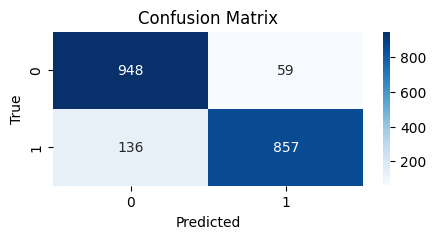

In [350]:
conf_matrix = confusion_matrix(y1_test_binary, predictions_binary1)
plt.figure(figsize=(5, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

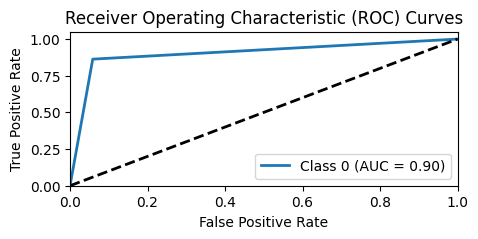

In [358]:
y_test_binarized = label_binarize(y1_test_binary, classes=np.unique(y1_test_binary))
y_pred_binarized = label_binarize(predictions_binary1, classes=np.unique(y1_test_binary))
n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(5, 2))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Version 2 
    # Building a new model for binary classification with seperate R, F, M scores now as it will provide more granularity and may improve the model accuracy scores

In [262]:
X2 = df[['total_transactions','num_campaigns','num_yes_campaigns','cust_life','Engagement_Score', 'R', 'F', 'M', 'most_common_yes_promotion']]
y2_binary = df['CLV_Category_binary']  

In [263]:
print(X2.dtypes)

total_transactions            int64
num_campaigns                 int64
num_yes_campaigns             int64
cust_life                     int32
Engagement_Score              int32
R                             int64
F                             int64
M                             int64
most_common_yes_promotion    object
dtype: object


In [264]:
print(y2_binary.dtypes)

# All data types are correct 

int64


In [265]:
# reserve 30% for testing data 
X2_train, X2_test, y2_train_binary, y2_test_binary = train_test_split(X2, y2_binary, test_size=0.2, random_state=42)

In [283]:
numeric_columns_class2 = ['total_transactions', 'num_campaigns', 'num_yes_campaigns', 'cust_life']
categorical_columns_class2 = ['R','F','M','Engagement_Score','most_common_yes_promotion']

In [285]:
# Building a Pre-processor 

# create a Column Transformer to scale the numeric columns

preprocessor_class2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns_class2),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns_class2)
    ])


In [280]:
# Setting up all classification models 
knn_binary_class2 = KNeighborsClassifier()
logreg_binary_class2 = LogisticRegression()
nb_binary_class2 = GaussianNB()

In [286]:
# Creating model pipelines for both preprocessing and model fitting to ensure cross validation also works, since we have object type columns in categorical features 
pipeline_knn_bin2 = Pipeline(steps=[
    ('preprocessor', preprocessor_class2),
    ('regressor', knn_binary_class2)
])
pipeline_logreg_bin2 = Pipeline(steps=[
    ('preprocessor', preprocessor_class2),
    ('regressor', logreg_binary_class2)
])
pipeline_nb_bin2 = Pipeline(steps=[
    ('preprocessor', preprocessor_class2),
    ('regressor', nb_binary_class2)
])

In [287]:
# Cross Validation to check what's the best model to use here
knn_scores_binary2 = cross_val_score(pipeline_knn_bin2, X2_train, y2_train_binary, scoring='accuracy', cv=5 )
logreg_scores_binary2 = cross_val_score(pipeline_logreg_bin2, X2_train, y2_train_binary, scoring='accuracy', cv=5 )
nb_scores_binary2 = cross_val_score(pipeline_nb_bin2, X2_train, y2_train_binary, scoring='accuracy', cv=5 )

In [288]:
print(np.mean(knn_scores_binary2))
print(np.mean(logreg_scores_binary2))
print(np.mean(nb_scores_binary2))

# Logreg is the best model as per the scores below, but we will use nb_scores only to compare the before/after of using different features 

0.9654999999999999
0.9765
0.9348750000000001


In [289]:
# Building a Pipeline

pipeline_binary2 = Pipeline(steps = [
    ('preprocessor',preprocessor_class2),
    ('classifier', GaussianNB())
    ])

In [290]:
# Setting up params grid
param_grid_binary2 = {
    'classifier__var_smoothing': np.logspace(0, -9, num=100)
}

In [291]:
grid_search_binary2 = GridSearchCV(pipeline_binary2, param_grid_binary2, cv=5, verbose=1, scoring='accuracy')
grid_search_binary2.fit(X2_train, y2_train_binary)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['total_transactions',
                                                                          'num_campaigns',
                                                                          'num_yes_campaigns',
                                                                          'cust_life']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['R',
                                                                          'F',
                                                                          'M',
                                                                          'Engagement_Score',
                                                                          'most_common_yes_promotion'])])),
                                       ('classifier', GaussianNB())]),
             param_grid={'classifi...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [292]:
best_params = grid_search_binary2.best_params_
print("Best parameters from grid search:", best_params)

Best parameters from grid search: {'classifier__var_smoothing': 0.006579332246575682}


In [302]:
# fit pipeline on x and y train 
pipeline_binary2.fit(X2_train, y2_train_binary)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['total_transactions',
                                                   'num_campaigns',
                                                   'num_yes_campaigns',
                                                   'cust_life']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['R', 'F', 'M',
                                                   'Engagement_Score',
                                                   'most_common_yes_promotion'])])),
                ('classifier', GaussianNB())])

In [303]:
predictions_binary2 = pipeline_binary2.predict(X2_test)

In [304]:
accuracy_score(y2_test_binary, predictions_binary2)

0.9305

In [305]:
precision_score(y2_test_binary, predictions_binary2)

0.9755011135857461

In [306]:
recall_score(y2_test_binary, predictions_binary2)

0.8821752265861027

In [307]:
f1_score(y2_test_binary, predictions_binary2)

0.9264939185616076

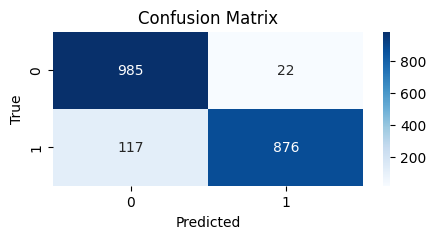

In [361]:
conf_matrix = confusion_matrix(y2_test_binary, predictions_binary2)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

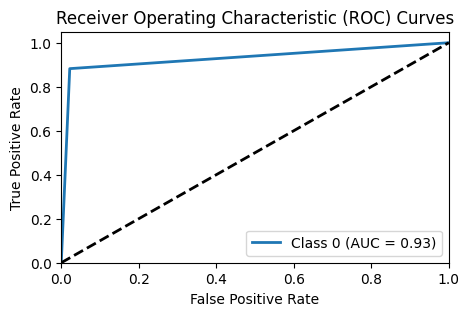

In [362]:
y_test_binarized1 = label_binarize(y2_test_binary, classes=np.unique(y2_test_binary))
y_pred_binarized1 = label_binarize(predictions_binary2, classes=np.unique(y2_test_binary))
n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized1[:, i], y_pred_binarized1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(5, 3))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Building Classification Model for Multiclass 

In [308]:
# Version 1

X1 = df[['total_transactions','num_campaigns','num_yes_campaigns','cust_life','Engagement_Score','RFM_Composite', 'most_common_yes_promotion']]
y1_multiclass = df['CLV_Category_multiclass']

In [309]:
print(X1.dtypes)

total_transactions            int64
num_campaigns                 int64
num_yes_campaigns             int64
cust_life                     int32
Engagement_Score              int32
RFM_Composite                 int64
most_common_yes_promotion    object
dtype: object


In [310]:
print(y1_multiclass.dtypes)

int32


In [311]:
# reserve 30% for testing data 
X1_train, X1_test, y1_train_multiclass, y1_test_multiclass = train_test_split(X1, y1_multiclass, test_size=0.2, random_state=42)

In [312]:
numeric_columns_class1 = ['total_transactions','num_campaigns','num_yes_campaigns','cust_life','RFM_Composite']
categorical_columns_class1 = ['Engagement_Score', 'most_common_yes_promotion']

In [313]:
preprocessor_multiclass1 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns_class1),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns_class1)
    ])

In [314]:
# Setting up all classification models 
knn_multiclass1 = KNeighborsClassifier()
logreg_multiclass1 = LogisticRegression()
nb_multiclass1 = GaussianNB()

In [315]:
# Creating model pipelines for both preprocessing and model fitting to ensure cross validation also works, since we have object type columns in categorical features 
pipeline_knn_class1 = Pipeline(steps=[
    ('preprocessor', preprocessor_class1),
    ('regressor', knn_multiclass1)
])
pipeline_logreg_class1 = Pipeline(steps=[
    ('preprocessor', preprocessor_class1),
    ('regressor', logreg_multiclass1)
])
pipeline_nb_class1 = Pipeline(steps=[
    ('preprocessor', preprocessor_class1),
    ('regressor', nb_multiclass1)
])

In [316]:
# Cross Validation to check what's the best model to use here
knn_scores_multiclass1 = cross_val_score(pipeline_knn_class1, X1_train, y1_train_multiclass, scoring='accuracy', cv=5 )
logreg_scores_multiclass1 = cross_val_score(pipeline_logreg_class1, X1_train, y1_train_multiclass, scoring='accuracy', cv=5 )
nb_scores_multiclass1 = cross_val_score(pipeline_nb_class1, X1_train, y1_train_multiclass, scoring='accuracy', cv=5 )

In [317]:
print(np.mean(knn_scores_multiclass1))
print(np.mean(logreg_scores_multiclass1))
print(np.mean(nb_scores_multiclass1))

# Very close scores for nb_scores and logreg, Using log reg this time 

0.7012499999999999
0.7558750000000001
0.75175


In [318]:
# Building a Pipeline

pipeline_multiclass1 = Pipeline(steps = [
    ('preprocessor',preprocessor_multiclass1),
    ('classifier', LogisticRegression())
    ])

In [319]:
# Setting up params grid
param_grid_multiclass1 = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 200, 300],
    'classifier__l1_ratio': [0, 0.5, 1] 
}

In [320]:
grid_search_multiclass1 = GridSearchCV(pipeline_multiclass1, param_grid_multiclass1, cv=5, verbose=1, scoring='accuracy')
grid_search_multiclass1.fit(X1_train, y1_train_multiclass)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


c:\Users\ali_s\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\ali_s\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\ali_s\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\ali_s\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\ali_s\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175:

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['total_transactions',
                                                                          'num_campaigns',
                                                                          'num_yes_campaigns',
                                                                          'cust_life',
                                                                          'RFM_Composite']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Engagement_Score',
                                                                          'most_common_yes_promotion'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__l1_ratio': [0, 0.5, 1],
                         'classifier__max_iter': [100, 200, 300],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 'none'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [364]:
print(grid_search_multiclass1.best_params_)

{'classifier__C': 0.1, 'classifier__l1_ratio': 0, 'classifier__max_iter': 300, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


In [365]:
best_model_multiclass1 = grid_search_multiclass1.best_estimator_
y_pred_multiclass1 = best_model_multiclass1.predict(X1_test)

In [366]:
# fit pipeline on x and y train 
best_model_multiclass1.fit(X1_train, y1_train_multiclass)

c:\Users\ali_s\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['total_transactions',
                                                   'num_campaigns',
                                                   'num_yes_campaigns',
                                                   'cust_life',
                                                   'RFM_Composite']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Engagement_Score',
                                                   'most_common_yes_promotion'])])),
                ('classifier',
                 LogisticRegression(C=0.1, l1_ratio=0, max_iter=300,
                                    penalty='l1', solver='saga'))])

In [367]:
predictions_multiclass1 = best_model_multiclass1.predict(X1_test)

In [369]:
accuracy_score(y1_test_multiclass, predictions_multiclass1)

0.7505

In [370]:
precision = precision_score(y1_test_multiclass, predictions_multiclass1, average='weighted')
print("Precision (weighted):", precision)

Precision (weighted): 0.7472481592341992


In [371]:
recall = recall_score(y1_test_multiclass, predictions_multiclass1, average='weighted')
print("Recall (weighted):", recall)

Recall (weighted): 0.7505


In [372]:
f1 = f1_score(y1_test_multiclass, predictions_multiclass1, average='weighted')
print("f1 (weighted):", f1)

f1 (weighted): 0.7483438140430196


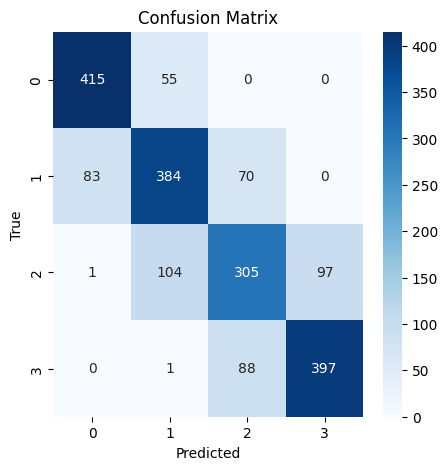

In [374]:
conf_matrix = confusion_matrix(y1_test_multiclass, predictions_multiclass1)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


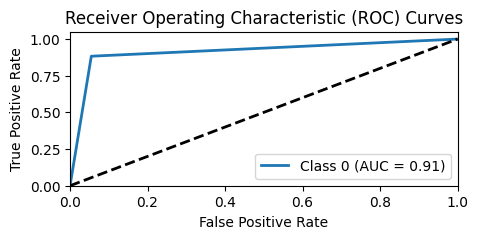

In [376]:
y_test_binarized3 = label_binarize(y1_test_multiclass, classes=np.unique(y1_test_multiclass))
y_pred_binarized3 = label_binarize(predictions_multiclass1, classes=np.unique(y1_test_multiclass))
n_classes = y_test_binarized.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized3[:, i], y_pred_binarized3[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(5, 2))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

In [329]:
# Version 2

X2 = df[['total_transactions','num_campaigns','num_yes_campaigns','cust_life','Engagement_Score', 'R', 'F', 'M', 'most_common_yes_promotion']]
y2_multiclass = df['CLV_Category_multiclass']  

In [330]:
print(X2.dtypes)

total_transactions            int64
num_campaigns                 int64
num_yes_campaigns             int64
cust_life                     int32
Engagement_Score              int32
R                             int64
F                             int64
M                             int64
most_common_yes_promotion    object
dtype: object


In [331]:
print(y2_multiclass.dtypes)
# All data types are correct 

int32


In [332]:
# reserve 30% for testing data 
X2_train, X2_test, y2_train_multiclass, y2_test_multiclass = train_test_split(X2, y2_multiclass, test_size=0.2, random_state=42)

In [333]:
numeric_columns_multiclass2 = ['total_transactions', 'num_campaigns', 'num_yes_campaigns', 'cust_life']
categorical_columns_multiclass2 = ['R','F', 'M', 'Engagement_Score','most_common_yes_promotion']

In [334]:
# Building a Pre-processor 
# create a Column Transformer to scale the numeric columns
preprocessor_class2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns_multiclass2),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns_multiclass2)
    ])

In [335]:
# Setting up all classification models 
knn_multiclass2 = KNeighborsClassifier()
logreg_multiclass2 = LogisticRegression()
nb_multiclass2 = GaussianNB()


In [336]:
# Creating model pipelines for both preprocessing and model fitting to ensure cross validation also works, since we have object type columns in categorical features 
pipeline_knn_class2 = Pipeline(steps=[
    ('preprocessor', preprocessor_class2),
    ('classifier', knn_multiclass2)
])
pipeline_logreg_class2 = Pipeline(steps=[
    ('preprocessor', preprocessor_class2),
    ('classifier', logreg_multiclass2)
])
pipeline_nb_class2 = Pipeline(steps=[
    ('preprocessor', preprocessor_class2),
    ('classifier', nb_multiclass2)
])

In [337]:
# Cross Validation to check what's the best model to use here
knn_scores_multiclass2 = cross_val_score(pipeline_knn_class2, X2_train, y2_train_multiclass, scoring='accuracy', cv=5 )
logreg_scores_multiclass2 = cross_val_score(pipeline_logreg_class2, X2_train, y2_train_multiclass, scoring='accuracy', cv=5 )
nb_scores_multiclass2 = cross_val_score(pipeline_nb_class2, X2_train, y2_train_multiclass, scoring='accuracy', cv=5 )


In [338]:
print(np.mean(knn_scores_multiclass2))
print(np.mean(logreg_scores_multiclass2))
print(np.mean(nb_scores_multiclass2))

# Continue to use logistic regression to see before/after effect - logreg is also the best model to use 

0.791875
0.8495000000000001
0.6762499999999999


In [342]:
# Building a Pipeline

pipeline_multiclass2 = Pipeline(steps = [
    ('preprocessor',preprocessor_class2),
    ('classifier', LogisticRegression())
    ])

In [339]:
# Setting up params grid
param_grid_multiclass2 = {
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__max_iter': [100, 200, 300],
    'classifier__l1_ratio': [0, 0.5, 1] 
}

In [343]:
grid_search_multiclass2 = GridSearchCV(pipeline_multiclass2, param_grid_multiclass2, cv=5, verbose=1, scoring='accuracy')
grid_search_multiclass2.fit(X2_train, y2_train_multiclass)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


c:\Users\ali_s\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\ali_s\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\ali_s\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\ali_s\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\ali_s\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175:

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['total_transactions',
                                                                          'num_campaigns',
                                                                          'num_yes_campaigns',
                                                                          'cust_life']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['R',
                                                                          'F',
                                                                          'M',
                                                                          'Engagement_Score',
                                                                          'most_common_yes_promotion'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__l1_ratio': [0, 0.5, 1],
                         'classifier__max_iter': [100, 200, 300],
                         'classifier__penalty': ['l1', 'l2', 'elasticnet',
                                                 'none'],
                         'classifier__solver': ['liblinear', 'saga']},
             scoring='accuracy', verbose=1)

In [377]:
print(grid_search_multiclass2.best_params_)

{'classifier__C': 0.01, 'classifier__l1_ratio': 0, 'classifier__max_iter': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


In [378]:
best_model_multiclass2 = grid_search_multiclass2.best_estimator_
y_pred_multiclass2 = best_model_multiclass2.predict(X2_test)

In [379]:
# fit pipeline on x and y train 
best_model_multiclass2.fit(X2_train, y2_train_binary)

c:\Users\ali_s\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['total_transactions',
                                                   'num_campaigns',
                                                   'num_yes_campaigns',
                                                   'cust_life']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['R', 'F', 'M',
                                                   'Engagement_Score',
                                                   'most_common_yes_promotion'])])),
                ('classifier',
                 LogisticRegression(C=0.01, l1_ratio=0, penalty='l1',
                                    solver='saga'))])

In [380]:
predictions_multiclass2 = best_model_multiclass2.predict(X2_test)

In [381]:
accuracy_score(y2_test_multiclass, predictions_multiclass2)

0.26

In [382]:
precision2 = precision_score(y2_test_multiclass, predictions_multiclass2, average='weighted')
print("Precision (weighted):", precision2)

Precision (weighted): 0.12828427262007452


c:\Users\ali_s\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [383]:
recall2 = recall_score(y2_test_multiclass, predictions_multiclass2, average='weighted')
print("Recall (weighted):", recall2)

Recall (weighted): 0.26


In [384]:
f1_2 = f1_score(y2_test_multiclass, predictions_multiclass2, average='weighted')
print("f1 (weighted):", f1_2)

f1 (weighted): 0.17179395119441515


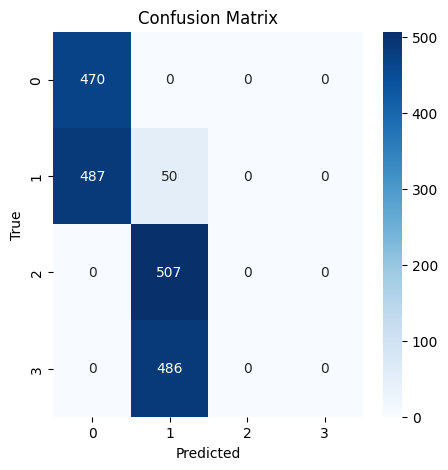

In [389]:
conf_matrix = confusion_matrix(y2_test_multiclass, predictions_multiclass2)
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Best models for each predictor variable 
    # CLV (Total Customer Lifetime Value): Model 2 (Input: Version 2, Output: CLV, model: linear regression model)
    # avg CLV/month: None of the provided models
    # Binary classes of CLV: Model 6 (Input: Version 2, Output: binary CLV category, model: nb_scores regression model)
